In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import time
import random
import operator
import pickle
from copy import deepcopy

In [2]:
df = pd.read_csv('flightlist-november.csv') 

print(df)

        callsign number  icao24 registration typecode origin destination  \
0        TUP6928    NaN  424450          NaN      NaN    NaN        UUWW   
1         CSN399  CZ399  781795          NaN      NaN   YMML        KJFK   
2         ETH714    NaN  040101       ET-ASG     B788   KEWR        ESSA   
3          ZSALT    NaN  008142       ZS-ALT     B190    NaN        YPPH   
4         IRM112  W5112  7335a1       EP-MMA     A343   WMKK        LTBW   
...          ...    ...     ...          ...      ...    ...         ...   
1825010   NKS236  NK236  ac97e1       N910NK      NaN    NaN        KFLL   
1825011    AM333    NaN  7c6a57       VH-VAH     BE20   YMAV        YMEN   
1825012   N404AM    NaN  a4bb89       N404AM     B407    NaN        1IL4   
1825013   N383AK    NaN  a46679       N383AK      NaN   PAMR        PAMR   
1825014   EJA426  1I426  a51358       N426QS     GLF4   KALN        KSUS   

                         firstseen                   lastseen  \
0        2020-10-31 01

In [3]:
dfs = df

In [4]:
dfs = dfs.drop(['number', 'icao24', 'altitude_1', 'altitude_2'], axis=1)

In [5]:
dfs = dfs.dropna(subset=['registration', 'typecode', 'origin', 'destination', 'latitude_2', 'longitude_2'])

In [6]:
dfs = dfs[dfs["callsign"].str[:3]=="SIA"]

In [7]:
dfs.head()

,callsign,registration,typecode,origin,destination,firstseen,lastseen,day,latitude_1,longitude_1,latitude_2,longitude_2
34,SIA377,9V-SMG,A359,LIMC,WSSS,2020-10-31 12:31:55+00:00,2020-11-01 00:48:28+00:00,2020-11-01 00:00:00+00:00,45.623749,8.735337,1.308929,103.960644
161,SIA26,9V-SMI,A359,WSSS,EDDF,2020-10-31 16:12:38+00:00,2020-11-01 04:36:47+00:00,2020-11-01 00:00:00+00:00,1.395721,103.997048,50.040572,8.549163
167,SIA324,9V-SMT,A359,WSSS,EHAM,2020-10-31 16:16:27+00:00,2020-11-01 04:55:17+00:00,2020-11-01 00:00:00+00:00,1.389542,103.994720,52.357628,4.711487
171,SIA283,9V-SMD,A359,WSSS,NZAA,2020-10-31 16:18:49+00:00,2020-11-01 01:19:01+00:00,2020-11-01 00:00:00+00:00,1.394240,103.996298,-36.991241,174.861496
267,SIA346,9V-SMH,A359,WSSS,LSZH,2020-10-31 17:42:04+00:00,2020-11-01 06:16:57+00:00,2020-11-01 00:00:00+00:00,1.392471,103.996251,47.478653,8.540771


In [8]:
dfs.registration.unique()
# dfs.origin.unique()

array(['9V-SMG', '9V-SMI', '9V-SMT', '9V-SMD', '9V-SMH', '9V-SFN',
       '9V-SMC', '9V-SFM', '9V-SMS', '9V-SFK', '9V-SML', '9V-SWQ',
       '9V-MGL', '9V-SMF', '9V-SFQ', '9V-SWE', '9V-SFI', '9V-SMO',
       '9V-SFP', '9V-SFO', '9V-SMQ', '9V-SMN', '9V-SMJ', '9V-SMM',
       '9V-SMB', '9V-SMP', '9V-SMA', '9V-SWY', '9V-SWR', '9V-SCB',
       '9V-SWP', '9V-SMK', '9V-MGI', '9V-SMR', '9V-SWM', '9V-SWH',
       '9V-SWO', '9V-MGF', '9V-SWS', '9V-SKU', '9V-SME', '9V-SWK',
       '9V-SWN'], dtype=object)

In [9]:
data = {'airport': [],
        'latitude': [],
        'longitude': []}

airports = pd.DataFrame(data)
print(airports)

Empty DataFrame
Columns: [airport, latitude, longitude]
Index: []


In [10]:
airports_data = dfs.origin.unique()
airports_another_data = dfs.destination.unique()

for i in airports_another_data:
    found = False
    for j in airports_data:
        if i == j:
            found = True
    if found == False:
        airports_data = np.append(airports_data, i)

In [11]:
print(airports_data)

['LIMC' 'WSSS' 'OMSJ' 'EGLL' 'YSSY' 'YMML' 'NZAA' 'KORD' 'WBSB' 'VOMM'
 'KDFW' 'EHAM' 'VHHH' 'EDDF' 'FAOR' 'YBBN' 'PANC' 'EBMB' 'WMKK' 'KLAX'
 'LSZH' 'NZCH' 'VOBL' 'ZUCK' 'VABB' 'LFPG' 'EKCH' 'VIDP' 'FARA' 'EBBR'
 'YPPH' 'LEBL' 'WSAC' 'VGZR' 'YSCB' 'RJAK' 'FAGM' 'LTBW' 'YTWB' 'YRED'
 'TS53' 'YPWH' 'RJAA' 'LTBA' 'FABB' 'VGTJ' '6AK5' 'WIDD']


In [12]:
for i in airports_data:
    if (np.isnan(dfs[dfs["origin"]==i]["latitude_1"].median())):
        latitude = dfs[dfs["destination"]==i]["latitude_2"].median()
        longitude = dfs[dfs["destination"]==i]["longitude_2"].median()
        
    elif (np.isnan(dfs[dfs["destination"]==i]["latitude_2"].median())):
        latitude = dfs[dfs["origin"]==i]["latitude_1"].median()
        longitude = dfs[dfs["origin"]==i]["longitude_1"].median()
        
    else:
        latitude = (dfs[dfs["origin"]==i]["latitude_1"].median() + dfs[dfs["destination"]==i]["latitude_2"].median())/2
        longitude = (dfs[dfs["origin"]==i]["longitude_1"].median() + dfs[dfs["destination"]==i]["longitude_2"].median())/2
        
    airport = {'airport': i, 'latitude': latitude, 'longitude': longitude}
    airports = airports.append(airport, ignore_index=True)

print(airports)

   airport   latitude   longitude
0     LIMC  45.622997    8.729880
1     WSSS   1.349354  103.991831
2     OMSJ  25.333187   55.513881
3     EGLL  51.464928   -0.451351
4     YSSY -33.937398  151.173686
5     YMML -37.659397  144.836085
6     NZAA -37.007307  174.802684
7     KORD  41.967407  -87.905482
8     WBSB   4.943314  114.927863
9     VOMM  12.988395   80.164536
10    KDFW  32.904827  -97.050797
11    EHAM  52.329506    4.733640
12    VHHH  22.306459  113.907723
13    EDDF  50.045047    8.569396
14    FAOR -26.110302   28.248013
15    YBBN -27.383320  153.122108
16    PANC  61.179126 -150.017751
17    EBMB  50.909637    4.492666
18    WMKK   2.714566  101.717297
19    KLAX  33.936884 -118.397799
20    LSZH  47.467043    8.551562
21    NZCH -43.486825  172.534596
22    VOBL  13.189594   77.703107
23    ZUCK  29.778076  106.693145
24    VABB  19.088734   72.868544
25    LFPG  48.996591    2.563600
26    EKCH  55.612789   12.641687
27    VIDP  28.559853   77.113512
28    FARA -26

In [13]:
e_asia = ["VOMM", "VHHH", "VOBL", "ZUCK", "VABB", "VIDP", "VGZR", "RJAK", "RJAA", "VGTJ"]
americas = ["KORD", "KDFW", "PANC", "KLAX", "TS53", "6AK5"]
europe = ["LIMC", "EGLL", "EHAM", "EDDF", "EBMB", "LSZH", "LFPG", "EKCH", "FARA", "EBBR", "LEBL"]
sw_pasific = ["WSSS", "YSSY", "YMML", "NZAA", "WBSB", "YBBN", "WMKK", "NZCH", "YPPH", "WSAC", "YSCB", "YTWB", "YRED", "YPWH", "WIDD"]
w_asia_africa = ["OMSJ", "FAOR", "FAGM", "LTBW", "LTBA", "FABB"]

In [14]:
region = []
load_rate = []
for i in range(len(airports)):
    for j in range(len(e_asia)):
        if(airports["airport"].iloc[i]==e_asia[j]):
            region.append("East Asia")
            load_rate.append(0.128)
            break
    for k in range(len(americas)):
        if(airports["airport"].iloc[i]==americas[k]):
            region.append("Americas")
            load_rate.append(0.113)
            break
    for l in range(len(europe)):
        if(airports["airport"].iloc[i]==europe[l]):
            region.append("Europe")
            load_rate.append(0.133)
            break
    for m in range(len(sw_pasific)):
        if(airports["airport"].iloc[i]==sw_pasific[m]):
            region.append("South West Pacific")
            load_rate.append(0.171)
            break
    for n in range(len(w_asia_africa)):
        if(airports["airport"].iloc[i]==w_asia_africa[n]):
            region.append("West Asia and Africa")
            load_rate.append(0.140)
            break
            
print(region)

['Europe', 'South West Pacific', 'West Asia and Africa', 'Europe', 'South West Pacific', 'South West Pacific', 'South West Pacific', 'Americas', 'South West Pacific', 'East Asia', 'Americas', 'Europe', 'East Asia', 'Europe', 'West Asia and Africa', 'South West Pacific', 'Americas', 'Europe', 'South West Pacific', 'Americas', 'Europe', 'South West Pacific', 'East Asia', 'East Asia', 'East Asia', 'Europe', 'Europe', 'East Asia', 'Europe', 'Europe', 'South West Pacific', 'Europe', 'South West Pacific', 'East Asia', 'South West Pacific', 'East Asia', 'West Asia and Africa', 'West Asia and Africa', 'South West Pacific', 'South West Pacific', 'Americas', 'South West Pacific', 'East Asia', 'West Asia and Africa', 'West Asia and Africa', 'East Asia', 'Americas', 'South West Pacific']


In [15]:
airports['region'] = region
airports['load_rate'] = load_rate
print(airports)

   airport   latitude   longitude                region  load_rate
0     LIMC  45.622997    8.729880                Europe      0.133
1     WSSS   1.349354  103.991831    South West Pacific      0.171
2     OMSJ  25.333187   55.513881  West Asia and Africa      0.140
3     EGLL  51.464928   -0.451351                Europe      0.133
4     YSSY -33.937398  151.173686    South West Pacific      0.171
5     YMML -37.659397  144.836085    South West Pacific      0.171
6     NZAA -37.007307  174.802684    South West Pacific      0.171
7     KORD  41.967407  -87.905482              Americas      0.113
8     WBSB   4.943314  114.927863    South West Pacific      0.171
9     VOMM  12.988395   80.164536             East Asia      0.128
10    KDFW  32.904827  -97.050797              Americas      0.113
11    EHAM  52.329506    4.733640                Europe      0.133
12    VHHH  22.306459  113.907723             East Asia      0.128
13    EDDF  50.045047    8.569396                Europe      0

In [16]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):

      R = 6378.1 #earth radius in km

      dLat = radians(lat2 - lat1)
      dLon = radians(lon2 - lon1)
      lat1 = radians(lat1)
      lat2 = radians(lat2)

      a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
      c = 2*asin(sqrt(a))

      return R * c

In [17]:
airport_dist = []

# print(len(airports))
# print(airports["latitude"].iloc[1])
for i in range(len(airports)):
    row = []
    for j in range(len(airports)):
        dist = haversine(airports["latitude"].iloc[i], airports["longitude"].iloc[i], airports["latitude"].iloc[j], airports["longitude"].iloc[j])
        row.append(dist)
    airport_dist.append(row)
    
print(airport_dist)
    

[[0.0, 10320.430258215578, 4717.841781312695, 937.1660268519785, 16609.560128529316, 16328.954466590929, 18532.59680591183, 7269.0678188569245, 10868.089507810684, 7548.95074633125, 8547.656137571441, 801.3169185796232, 9367.72272863323, 492.40317589072635, 8226.20896899483, 16305.371451274925, 7994.969157835845, 666.7552359065804, 10035.00646673157, 9707.300556374426, 205.7303869886589, 18733.26757149963, 7342.358008596109, 8269.138067898637, 6515.603799301376, 597.7053144643955, 1145.392331724757, 6165.855188281992, 8219.648382286154, 665.8771017492281, 13763.71195323607, 714.7633108335267, 10321.464585191243, 7525.8491042544, 16538.803322184736, 9739.086961262197, 8236.528918768696, 1684.8073009086406, 16240.840339895418, 16299.853550010886, 8549.282279244859, 16231.958278267468, 9772.276447147076, 1706.5289191728648, 8237.618885773374, 7530.724450895547, 7997.137643355396, 10343.682712043537], [10320.430258215578, 0.0, 5841.7632385838115, 10894.76051264912, 6299.836779033911, 6038.

In [18]:
dfs['day'].value_counts()

2020-11-28 00:00:00+00:00    40
2020-11-15 00:00:00+00:00    38
2020-11-25 00:00:00+00:00    38
2020-11-16 00:00:00+00:00    37
2020-11-29 00:00:00+00:00    37
2020-11-22 00:00:00+00:00    37
2020-11-21 00:00:00+00:00    37
2020-11-18 00:00:00+00:00    37
2020-11-23 00:00:00+00:00    36
2020-11-20 00:00:00+00:00    36
2020-11-04 00:00:00+00:00    35
2020-11-09 00:00:00+00:00    35
2020-11-14 00:00:00+00:00    35
2020-11-19 00:00:00+00:00    34
2020-11-01 00:00:00+00:00    34
2020-11-13 00:00:00+00:00    34
2020-11-11 00:00:00+00:00    34
2020-11-30 00:00:00+00:00    34
2020-11-02 00:00:00+00:00    33
2020-11-08 00:00:00+00:00    33
2020-11-07 00:00:00+00:00    33
2020-11-26 00:00:00+00:00    33
2020-11-27 00:00:00+00:00    33
2020-11-12 00:00:00+00:00    32
2020-11-06 00:00:00+00:00    32
2020-11-05 00:00:00+00:00    32
2020-11-17 00:00:00+00:00    30
2020-11-10 00:00:00+00:00    28
2020-11-03 00:00:00+00:00    27
2020-11-24 00:00:00+00:00    26
Name: day, dtype: int64

In [19]:
# dfs[dfs["day"].isin({day, day_after})]

In [20]:
day = "2020-11-21 00:00:00+00:00"
# day_after = "2020-11-30 00:00:00+00:00"
day_after = "2020-11-30 00:00:00+00:00"
day_before = "2020-11-20 00:00:00+00:00"
# dfx = dfs[dfs["day"]==day]
# dfx = dfs[dfs["day"].isin({day, day_after})]
# dfx = dfs[dfs["day"].isin({day, day_after})]
dfx = dfs[(dfs["day"] >= day) & (dfs["day"] <= day_after)]
dfy = dfs[dfs["day"]<day]
dfx = dfx[:100]

In [21]:
print(dfx)

        callsign registration typecode origin destination  \
1208410   SIA322       9V-SMQ     A359   WSSS        EGLL   
1208521   SIA324       9V-SMM     A359   WSSS        EHAM   
1208877    SIA26       9V-SMB     A359   WSSS        EDDF   
1211170   SIA352       9V-SMN     A359   WSSS        EKCH   
1215881   SIA478       9V-SMA     A359   WSSS        FABB   
...          ...          ...      ...    ...         ...   
1375418  SIA8879       9V-SWS     B77W   WSSS        WSSS   
1378407  SIA7381       9V-SFQ     B744   KLAX        EHAM   
1380995   SIA323       9V-SMM     A359   EHAM        WSSS   
1381034   SIA345       9V-SML     A359   LSZH        WSSS   
1381044   SIA335       9V-SMJ     A359   LFPG        WSSS   

                         firstseen                   lastseen  \
1208410  2020-11-20 16:06:59+00:00  2020-11-21 05:40:59+00:00   
1208521  2020-11-20 16:08:35+00:00  2020-11-21 05:29:37+00:00   
1208877  2020-11-20 16:13:20+00:00  2020-11-21 05:09:18+00:00   
1211170

In [22]:
data = {'airplane': [],
        'type': [],
        'curr_loc': [],
        'last_seen': [],
        'capacity': [],
        'fixed_cost': [],
        'min_cost': [],
        'idle_cost': []}

airplanes = pd.DataFrame(data)
print(airplanes)

Empty DataFrame
Columns: [airplane, type, curr_loc, last_seen, capacity, fixed_cost, min_cost, idle_cost]
Index: []


In [23]:
airplanes_data = dfs.registration.unique()
print(airplanes_data)

['9V-SMG' '9V-SMI' '9V-SMT' '9V-SMD' '9V-SMH' '9V-SFN' '9V-SMC' '9V-SFM'
 '9V-SMS' '9V-SFK' '9V-SML' '9V-SWQ' '9V-MGL' '9V-SMF' '9V-SFQ' '9V-SWE'
 '9V-SFI' '9V-SMO' '9V-SFP' '9V-SFO' '9V-SMQ' '9V-SMN' '9V-SMJ' '9V-SMM'
 '9V-SMB' '9V-SMP' '9V-SMA' '9V-SWY' '9V-SWR' '9V-SCB' '9V-SWP' '9V-SMK'
 '9V-MGI' '9V-SMR' '9V-SWM' '9V-SWH' '9V-SWO' '9V-MGF' '9V-SWS' '9V-SKU'
 '9V-SME' '9V-SWK' '9V-SWN']


In [24]:
airplanes_capacity = []
airplanes_fixedcost = []
airplanes_idlecost = []
airplanes_minutecost = []

for i in range(len(airplanes_data)):
    for j in range(len(dfs)):
        if(dfs["registration"].iloc[j]==airplanes_data[i]):
            if(dfs["typecode"].iloc[j]=="A359"):
                capacity = 350
                min_cost = 244
                fixed_cost = 946.069
                idle_min_cost = 195
            elif(dfs["typecode"].iloc[j]=="B744"):
                capacity = 416
                min_cost = 321
                fixed_cost = 851.244
                idle_min_cost = 257
            elif(dfs["typecode"].iloc[j]=="B77W"):
                capacity = 264
                min_cost = 194
                fixed_cost = 969.244
                idle_min_cost = 155
            elif(dfs["typecode"].iloc[j]=="B738"):
                capacity = 215
                min_cost = 116
                fixed_cost = 732.745
                idle_min_cost = 92
            elif(dfs["typecode"].iloc[j]=="B78X"):
                capacity = 337
                min_cost = 187
                fixed_cost = 1001.250
                idle_min_cost = 150
            elif(dfs["typecode"].iloc[j]=="A388"):
                capacity = 471
                min_cost = 433
                fixed_cost = 638.418
                idle_min_cost = 347
            airplanes_capacity.append(int(capacity))
            airplanes_fixedcost.append(int(fixed_cost))
            airplanes_idlecost.append(int(idle_min_cost))
            airplanes_minutecost.append(int(min_cost))
            break

print(airplanes_capacity)

[350, 350, 350, 350, 350, 416, 350, 416, 350, 416, 350, 264, 215, 350, 416, 264, 416, 350, 416, 416, 350, 350, 350, 350, 350, 350, 350, 264, 264, 337, 264, 350, 215, 350, 264, 264, 264, 215, 264, 471, 350, 264, 264]


In [25]:
no_airplane = 0
for i in airplanes_data:
    for j in range(len(dfx)):
        if(dfx["registration"].iloc[j]==i):
            airplane = {'airplane': i,
                        'type': dfx["typecode"].iloc[j],
                        'curr_loc': dfx["origin"].iloc[j],
                        'last_seen': dfx["firstseen"].iloc[j],
                        'capacity': airplanes_capacity[no_airplane],
                        'fixed_cost': airplanes_fixedcost[no_airplane],
                        'min_cost': airplanes_minutecost[no_airplane],
                        'idle_cost': airplanes_idlecost[no_airplane]}
            
            airplanes = airplanes.append(airplane, ignore_index=True)
            break
        elif((j==(len(dfx)-1)) and (dfx["registration"].iloc[j]!=i)):
            for k in range(len(dfy)):
                if((k!=0) and (dfy["registration"].iloc[-k]==i)):
                    airplane = {'airplane': i,
                                'type': dfy["typecode"].iloc[-k],
                                'curr_loc': dfy["destination"].iloc[-k],
                                'last_seen': dfy["firstseen"].iloc[-k],
                                'capacity': airplanes_capacity[no_airplane],
                                'fixed_cost': airplanes_fixedcost[no_airplane],
                                'min_cost': airplanes_minutecost[no_airplane],
                                'idle_cost': airplanes_idlecost[no_airplane]}
                    
                    airplanes = airplanes.append(airplane, ignore_index=True)
                    break
                elif((k==(len(dfy)-1)) and (dfy["registration"].iloc[-k]!=i)):
                    for l in range(len(dfs)):
                        if((l!=0) and (dfs["registration"].iloc[-l]==i)):
                            airplane = {'airplane': i,
                                        'type': dfs["typecode"].iloc[-l],
                                        'curr_loc': "WSSS",
                                        'last_seen': day_before,
                                        'capacity': airplanes_capacity[no_airplane],
                                        'fixed_cost': airplanes_fixedcost[no_airplane],
                                        'min_cost': airplanes_minutecost[no_airplane],
                                        'idle_cost': airplanes_idlecost[no_airplane]}
                            airplanes = airplanes.append(airplane, ignore_index=True)
                            break
                            
    no_airplane = no_airplane + 1
    
print(airplanes)

   airplane  type curr_loc                  last_seen  capacity  fixed_cost  \
0    9V-SMG  A359     LSZH  2020-11-21 13:12:36+00:00     350.0       946.0   
1    9V-SMI  A359     WSSS  2020-11-20 17:54:12+00:00     350.0       946.0   
2    9V-SMT  A359     WSSS  2020-11-22 02:15:05+00:00     350.0       946.0   
3    9V-SMD  A359     NZCH  2020-11-20 22:51:25+00:00     350.0       946.0   
4    9V-SMH  A359     LFPG  2020-11-21 10:03:18+00:00     350.0       946.0   
5    9V-SFN  B744     WSSS  2020-11-21 03:07:03+00:00     416.0       851.0   
6    9V-SMC  A359     WSSS  2020-11-23 00:43:50+00:00     350.0       946.0   
7    9V-SFM  B744     WSSS  2020-11-20 22:21:21+00:00     416.0       851.0   
8    9V-SMS  A359     WSSS  2020-11-21 16:05:15+00:00     350.0       946.0   
9    9V-SFK  B744     WSSS  2020-11-22 06:01:20+00:00     416.0       851.0   
10   9V-SML  A359     WSSS  2020-11-21 01:12:22+00:00     350.0       946.0   
11   9V-SWQ  B77W     WSSS  2020-11-18 17:03:08+00:0

In [26]:
max_delay = 180 #minute
min_safe = 30 #minute
max_arrival = max_delay - min_safe

def createSchedule():
    created = False
    while(created==False):
        airplanes_temp = airplanes.copy()
        schedule = []
        wakeup = time.time() + 10
        for i in range(len(dfx)):
            flight = [i]

            found = False
            while (found == False):
                id_airplane = random.randint(0, len(airplanes)-1)
                if (pd.to_datetime(airplanes_temp["last_seen"].iloc[id_airplane]) < (pd.to_datetime(dfx["firstseen"].iloc[i])+ datetime.timedelta(minutes=max_arrival)) and airplanes_temp["curr_loc"].iloc[id_airplane]==dfx["origin"].iloc[i]):
                    found = True
                else:
                    if (time.time() > wakeup):
                        break       

            airplanes_temp["curr_loc"].iloc[id_airplane]=dfx["destination"].iloc[i]

            if (pd.to_datetime(airplanes_temp["last_seen"].iloc[id_airplane]) < (pd.to_datetime(dfx["firstseen"].iloc[i]) - datetime.timedelta(minutes=min_safe))):
                departure = pd.to_datetime(dfx["firstseen"].iloc[i])
                arrival = departure + (pd.to_datetime(dfx["lastseen"].iloc[i])-pd.to_datetime(dfx["firstseen"].iloc[i]))
                airplanes_temp["last_seen"].iloc[id_airplane]=arrival
            else:
                departure = pd.to_datetime(airplanes_temp["last_seen"].iloc[id_airplane]) + datetime.timedelta(minutes=min_safe)
                arrival = departure + (pd.to_datetime(dfx["lastseen"].iloc[i])-pd.to_datetime(dfx["firstseen"].iloc[i]))
                airplanes_temp["last_seen"].iloc[id_airplane]=arrival

            for j in range(len(airports)):
                if(airports["airport"].iloc[j]==dfx["destination"].iloc[i]):
                    load_rate = airports["load_rate"].iloc[j]
                    break     

            passenger = round(airplanes_temp["capacity"].iloc[id_airplane] * load_rate)

            flight.extend([id_airplane, departure, arrival, passenger, load_rate])
            schedule.append(flight)
        if(len(dfx)==len(schedule)):
            created = True
    
    return schedule

In [27]:
def createOriginalSchedule():
    schedule = []
    for i in range(len(dfx)):
        flight=[i]
        for j in range(len(airplanes)):
            if(airplanes["airplane"].iloc[j]==dfx["registration"].iloc[i]):
                break
        flight.append(j)
        flight.append(pd.to_datetime(dfx["firstseen"].iloc[i]))
        flight.append(pd.to_datetime(dfx["lastseen"].iloc[i]))
        for k in range(len(airports)):
            if(airports["airport"].iloc[k]==dfx["destination"].iloc[i]):
                break
        flight.append(round(airplanes["capacity"].iloc[j] * airports["load_rate"].iloc[k]))
        flight.append(airports["load_rate"].iloc[k])
        
        schedule.append(flight)
        
    return schedule
        

In [28]:
# normalisasi passengger & cost
# cost = fixed cost & minute cost
def countOriginalFitness(schedule):
    fitness = []
    cost = 0
    passenger = 0
    profit = 0
    plane_count = 0
    for i in range(len(schedule)):
        if(airplanes["type"].iloc[schedule[i][1]]=="A359"):
            min_cost = 244
        elif(airplanes["type"].iloc[schedule[i][1]]=="B744"):
            min_cost = 321
        elif(airplanes["type"].iloc[schedule[i][1]]=="B77W"):
            min_cost = 194
        elif(airplanes["type"].iloc[schedule[i][1]]=="B738"):
            min_cost = 116
        elif(airplanes["type"].iloc[schedule[i][1]]=="B78X"):
            min_cost = 187
        elif(airplanes["type"].iloc[schedule[i][1]]=="A388"):
            min_cost = 433
        cost = cost + round((schedule[i][3]-schedule[i][2]).seconds/60)*min_cost
        passenger = passenger + schedule[i][4]
        profit = profit + (round((schedule[i][3]-schedule[i][2]).seconds/60)*2.428)*passenger
        
        for k in range(len(airports)):
            if(airports["airport"].iloc[k]==dfx["origin"].iloc[i]):
                origin_id = k
            if(airports["airport"].iloc[k]==dfx["destination"].iloc[i]):
                destination_id = k
        
        cost = cost + airport_dist[origin_id][destination_id]
        
    for j in range(len(airplanes)):
        plane_used = False
        idle_sec = 0
        fixed_cost = 0
        first_flight = pd.to_datetime(airplanes["last_seen"].iloc[j])
        last_flight = pd.to_datetime(dfx["lastseen"].iloc[len(dfx)-1])
        
        for k in range(len(schedule)):
            if(schedule[k][1]==j):
                if(plane_used==False):
                    plane_used = True
                    plane_count = plane_count + 1
                    lastflight_pos = k
                    idle_sec = idle_sec + (schedule[k][2] - first_flight).seconds
                else:
                    idle_sec = idle_sec + (schedule[k][2] - schedule[lastflight_pos][2]).seconds
                    lastflight_pos = k
                    
        if(plane_used==False):
            idle_sec = idle_sec + (last_flight - first_flight).seconds
            fixed_cost = 0
        else:
            idle_sec = idle_sec + (last_flight - schedule[lastflight_pos][3]).seconds
            if(airplanes["type"].iloc[j]=="A359"):
                fixed_cost = 946.069
            elif(airplanes["type"].iloc[j]=="B744"):
                fixed_cost = 851.244
            elif(airplanes["type"].iloc[j]=="B77W"):
                fixed_cost = 969.244
            elif(airplanes["type"].iloc[j]=="B738"):
                fixed_cost = 732.745
            elif(airplanes["type"].iloc[j]=="B78X"):
                fixed_cost = 1001.250
            elif(airplanes["type"].iloc[j]=="A388"):
                fixed_cost = 638.418
        
        if(airplanes["type"].iloc[j]=="A359"):
            idle_min_cost = 195
        elif(airplanes["type"].iloc[j]=="B744"):
            idle_min_cost = 257
        elif(airplanes["type"].iloc[j]=="B77W"):
            idle_min_cost = 155
        elif(airplanes["type"].iloc[j]=="B738"):
            idle_min_cost = 92
        elif(airplanes["type"].iloc[j]=="B78X"):
            idle_min_cost = 150
        elif(airplanes["type"].iloc[j]=="A388"):
            idle_min_cost = 347
        
        cost = cost + round(idle_sec/60)*idle_min_cost
        cost = cost + fixed_cost
#     
#     fitness_val = (((passenger-0)/(4270-0)*1000)-((cost-0)/(50898241-0)*1000))
#     fitness_val = cost-passenger
    fitness_val = profit - cost
    fitness.append(fitness_val)
    fitness.append(passenger)
    fitness.append(cost)
    fitness.append(plane_count)
    
    return fitness

In [29]:
# normalisasi passengger & cost
# cost = fixed cost & minute cost
def countAirplaneFitness(schedule, airplane_id):
    fitness = []
    cost = 0
    passenger = 0
    profit = 0
    plane_used = False
    idle_sec = 0
    idle_min_cost = 0
    fixed_cost = 0
    id = airplane_id
    for i in range(len(schedule)):
        if(schedule[i][1]==id):
            if(airplanes["type"].iloc[id]=="A359"):
                min_cost = 244
            elif(airplanes["type"].iloc[id]=="B744"):
                min_cost = 321
            elif(airplanes["type"].iloc[id]=="B77W"):
                min_cost = 194
            elif(airplanes["type"].iloc[id]=="B738"):
                min_cost = 116
            elif(airplanes["type"].iloc[id]=="B78X"):
                min_cost = 187
            elif(airplanes["type"].iloc[id]=="A388"):
                min_cost = 433
            cost = cost + round((schedule[i][3]-schedule[i][2]).seconds/60)*min_cost
            passenger = passenger + schedule[i][4]
            profit = profit + (round((schedule[i][3]-schedule[i][2]).seconds/60)*2.428)*passenger
            
            for k in range(len(airports)):
                if(airports["airport"].iloc[k]==dfx["origin"].iloc[i]):
                    origin_id = k
                if(airports["airport"].iloc[k]==dfx["destination"].iloc[i]):
                    destination_id = k

            cost = cost + airport_dist[origin_id][destination_id]
        
    first_flight = pd.to_datetime(airplanes["last_seen"].iloc[id])
    last_flight = pd.to_datetime(dfx["lastseen"].iloc[len(dfx)-1])

    for k in range(len(schedule)):
        if(schedule[k][1]==id):
            if(plane_used==False):
                plane_used = True
                lastflight_pos = k
                idle_sec = idle_sec + (schedule[k][2] - first_flight).seconds
            else:
                idle_sec = idle_sec + (schedule[k][2] - schedule[lastflight_pos][2]).seconds
                lastflight_pos = k

    if(plane_used==False):
        idle_sec = idle_sec + (last_flight - first_flight).seconds
        fixed_cost = 0
    else:
        idle_sec = idle_sec + (last_flight - schedule[lastflight_pos][3]).seconds
        if(airplanes["type"].iloc[id]=="A359"):
            fixed_cost = 946.069
        elif(airplanes["type"].iloc[id]=="B744"):
            fixed_cost = 851.244
        elif(airplanes["type"].iloc[id]=="B77W"):
            fixed_cost = 969.244
        elif(airplanes["type"].iloc[id]=="B738"):
            fixed_cost = 732.745
        elif(airplanes["type"].iloc[id]=="B78X"):
            fixed_cost = 1001.250
        elif(airplanes["type"].iloc[id]=="A388"):
            fixed_cost = 638.418

    if(airplanes["type"].iloc[id]=="A359"):
        idle_min_cost = 195
    elif(airplanes["type"].iloc[id]=="B744"):
        idle_min_cost = 257
    elif(airplanes["type"].iloc[id]=="B77W"):
        idle_min_cost = 155
    elif(airplanes["type"].iloc[id]=="B738"):
        idle_min_cost = 92
    elif(airplanes["type"].iloc[id]=="B78X"):
        idle_min_cost = 150
    elif(airplanes["type"].iloc[id]=="A388"):
        idle_min_cost = 347

    cost = cost + round(idle_sec/60)*idle_min_cost
    cost = cost + fixed_cost
    
    originalFitness = countOriginalFitness(createOriginalSchedule())
    
#     fitness_val = (((passenger-0)/(originalFitness[1]-0)*(2*originalFitness[1]))-((cost-0)/(originalFitness[2]-0)*originalFitness[1]))
#     fitness_val = cost-passenger
    fitness_val = profit - cost
    fitness.append(fitness_val)
    fitness.append(passenger)
    fitness.append(round(cost))
    
    return fitness

In [30]:
# normalisasi passengger & cost
# cost = fixed cost & minute cost
def countFitness(schedule):
    fitness = []
    cost = 0
    passenger = 0
    profit = 0
    plane_count = 0
    for i in range(len(schedule)):
        if(airplanes["type"].iloc[schedule[i][1]]=="A359"):
            min_cost = 244
        elif(airplanes["type"].iloc[schedule[i][1]]=="B744"):
            min_cost = 321
        elif(airplanes["type"].iloc[schedule[i][1]]=="B77W"):
            min_cost = 194
        elif(airplanes["type"].iloc[schedule[i][1]]=="B738"):
            min_cost = 116
        elif(airplanes["type"].iloc[schedule[i][1]]=="B78X"):
            min_cost = 187
        elif(airplanes["type"].iloc[schedule[i][1]]=="A388"):
            min_cost = 433
        cost = cost + round((schedule[i][3]-schedule[i][2]).seconds/60)*min_cost
        passenger = passenger + schedule[i][4]
        profit = profit + (round((schedule[i][3]-schedule[i][2]).seconds/60)*2.428)*passenger
        
        for k in range(len(airports)):
            if(airports["airport"].iloc[k]==dfx["origin"].iloc[i]):
                origin_id = k
            if(airports["airport"].iloc[k]==dfx["destination"].iloc[i]):
                destination_id = k
        
        cost = cost + airport_dist[origin_id][destination_id]
        
    for j in range(len(airplanes)):
        plane_used = False
        idle_sec = 0
        fixed_cost = 0
        first_flight = pd.to_datetime(airplanes["last_seen"].iloc[j])
        last_flight = pd.to_datetime(dfx["lastseen"].iloc[len(dfx)-1])
        
        for k in range(len(schedule)):
            if(schedule[k][1]==j):
                if(plane_used==False):
                    plane_used = True
                    plane_count = plane_count + 1
                    lastflight_pos = k
                    idle_sec = idle_sec + (schedule[k][2] - first_flight).seconds
                else:
                    idle_sec = idle_sec + (schedule[k][2] - schedule[lastflight_pos][2]).seconds
                    lastflight_pos = k
                    
        if(plane_used==False):
            idle_sec = idle_sec + (last_flight - first_flight).seconds
            fixed_cost = 0
        else:
            idle_sec = idle_sec + (last_flight - schedule[lastflight_pos][3]).seconds
            if(airplanes["type"].iloc[j]=="A359"):
                fixed_cost = 946.069
            elif(airplanes["type"].iloc[j]=="B744"):
                fixed_cost = 851.244
            elif(airplanes["type"].iloc[j]=="B77W"):
                fixed_cost = 969.244
            elif(airplanes["type"].iloc[j]=="B738"):
                fixed_cost = 732.745
            elif(airplanes["type"].iloc[j]=="B78X"):
                fixed_cost = 1001.250
            elif(airplanes["type"].iloc[j]=="A388"):
                fixed_cost = 638.418
        
        if(airplanes["type"].iloc[j]=="A359"):
            idle_min_cost = 195
        elif(airplanes["type"].iloc[j]=="B744"):
            idle_min_cost = 257
        elif(airplanes["type"].iloc[j]=="B77W"):
            idle_min_cost = 155
        elif(airplanes["type"].iloc[j]=="B738"):
            idle_min_cost = 92
        elif(airplanes["type"].iloc[j]=="B78X"):
            idle_min_cost = 150
        elif(airplanes["type"].iloc[j]=="A388"):
            idle_min_cost = 347
        
        cost = cost + round(idle_sec/60)*idle_min_cost
        cost = cost + fixed_cost
        
    originalFitness = countOriginalFitness(createOriginalSchedule())
    
#     fitness_val = (((passenger-0)/(originalFitness[1]-0)*(2*originalFitness[1]))-((cost-0)/(originalFitness[2]-0)*originalFitness[1]))
#     fitness_val = cost-passenger
    fitness_val = profit - cost
    fitness.append(fitness_val)
    fitness.append(passenger)
    fitness.append(round(cost))
    fitness.append(plane_count)
    
    return fitness

In [31]:
def elite(population):
    curr_elite = 0
    for i in range(len(population)):
        if(population[i][0] > population[curr_elite][0]):
            curr_elite = i
    return curr_elite

In [32]:
def roulleteWheel(population):
    sump = 0
    sumpart = 0
    worst = 0
    
    for k in range(len(population)):
#         print("worst", population[worst][0])
        if(population[k][0] < population[worst][0]):
            worst = k 
    
    for i in range(len(population)):
        if(population[worst][0] < 0):
            sump = sump + population[i][0] - population[worst][0]
        else:
            sump = sump + population[i][0]
#         print("sump", sump)
    
    rand = random.uniform(0, sump)
#     print("Random", rand)
    
    for j in range(len(population)):
        if(population[worst][0] < 0):
            sumpart = sumpart + population[j][0] - population[worst][0]
        else:
            sumpart = sumpart + population[j][0]
#         print("sumpart", sumpart)
        if(sumpart > rand):
            break
    
    return j

In [33]:
def swapPlane(flight1, flight2):
    newflight1 = []
    newflight2 = []
    result = []

#     print(flight1[1])
#     print(flight2[1])
    
    newflight1.append(flight1[0])
    newflight2.append(flight2[0])
    
    newflight1.append(flight2[1])
    newflight2.append(flight1[1])
    
#     print(newflight1[1])
#     print(newflight2[1])
    
    newflight1.append(flight2[2])
    newflight2.append(flight1[2])

    newflight1.append(flight1[2] + (flight2[3] - flight2[2]))
    newflight2.append(flight2[2] + (flight1[3] - flight1[2]))
    
    newflight1.append(round(airplanes["capacity"].iloc[flight1[1]] * flight2[5]))
    newflight2.append(round(airplanes["capacity"].iloc[flight2[1]] * flight1[5]))
    
    newflight1.append(flight1[5])
    newflight2.append(flight2[5])
    
    result = [newflight1, newflight2]
    return result

In [34]:
def rao3(solutions, rand_solution, best_solution, worst_solution):
    start_solution = deepcopy(solutions)
    state = 1
    while (state == 1):
        rao3_done = False
        while (rao3_done == False):
#             print(1)
            solution = deepcopy(start_solution)
            rand_flight = random.randint(0, len(solution)-1) 
            flight_len = round((solution[rand_flight][3]-solution[rand_flight][2]).seconds/60)
            airplanelist = []
            for i in range(len(airplanes)):
                airplane = [i, airplanes["curr_loc"].iloc[i], airplanes["last_seen"].iloc[i], airplanes["capacity"].iloc[i], airplanes["fixed_cost"].iloc[i], airplanes["min_cost"].iloc[i], airplanes["idle_cost"].iloc[i], 0]
                airplanelist.append(airplane)
            for j in range(rand_flight):
                airplanelist[solution[j][1]][1] = dfx["destination"].iloc[j]
                airplanelist[solution[j][1]][2] = solution[j][3]

            available_airplanes = []
            for airplane in airplanelist:
                if (airplane[0] != solution[rand_flight][1] and airplane[1] == dfx["origin"].iloc[rand_flight] and pd.to_datetime(airplane[2]) < (pd.to_datetime(dfx["firstseen"].iloc[rand_flight]) + datetime.timedelta(minutes=min_safe))):
                    available_airplanes.append(airplane)
     
            if(len(available_airplanes) >= 3):
                rao3_solution = []
                variables = ["capacity", "fixed_cost", "min_cost", "idle_cost"]
                for variable in variables:
                    xsolution = airplanes[variable].iloc[solution[rand_flight][1]]
                    xrandsolution = airplanes[variable].iloc[rand_solution[rand_flight][1]]
                    xbests = airplanes[variable].iloc[best_solution[rand_flight][1]]
                    xworst = airplanes[variable].iloc[worst_solution[rand_flight][1]]

                    if(countFitness(solution)[0] > countFitness(rand_solution)[0]):
                        or1 = xsolution
                        or2 = xrandsolution
                    else:
                        or1 = xrandsolution
                        or2 = xsolution

                    xsolution = xsolution + (random.random()*(xbests- abs(xworst))) + (random.random()*(abs(or1) - abs(or2)))
                    if(variable=="capacity"):
                        xsolution = xsolution*2.428*flight_len
                    else:
                        xsolution = xsolution*flight_len
                    rao3_solution.append(xsolution)
                rao3_solution = np.array(rao3_solution)

                for airplane in available_airplanes:
                    airplane_solution = []
                    for i in range(4):
                        if(i==0):
                            airplane_solution.append(airplane[i+4]*2.428*flight_len)
                        else:
                            airplane_solution.append(airplane[i+4]*flight_len)
                    airplane_solution = np.array(airplane_solution)
                    airplane[-1] = np.linalg.norm(rao3_solution - airplane_solution)    

                new_solution = []
                available_airplanes = sorted(available_airplanes,key=lambda l:l[7], reverse=True)
                airplane1 = solution[rand_flight][1]
                airplane2 = available_airplanes[0][0]
                last_pos1 = -1
                last_pos2 = -1
                for l in range(len(solution)):
                    if(l < rand_flight):
                        new_solution.append(solution[l])
                        if(solution[l][1]==airplane1):
                            last_pos1 = l
                        elif(solution[l][1]==airplane2):
                            last_pos2 = l   
                    else:                                        
                        newflight = solution[l]
                        newflight[4] = round(airplanes["capacity"].iloc[newflight[1]] * newflight[5])
                        if(solution[l][1]==airplane1):
                            newflight[1] = airplane2                        
                            if(last_pos2 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution[last_pos2][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution[last_pos2][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution[last_pos2][3] + (solution[l][3]-solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos2 = l        
                        elif(solution[l][1]==airplane2):
                            newflight[1] = airplane1                        
                            if(last_pos1 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution[last_pos1][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution[last_pos1][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution[last_pos1][3] + (solution[l][3]-solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos1 = l 
                        new_solution.append(newflight)                    
                        
                rao3_done = True
                if(rao3_done == True):
                    state = 0
                    start_solution = deepcopy(new_solution)
#         state = random.randint(0,1)
        
    return new_solution 

In [35]:
print(dfx)

        callsign registration typecode origin destination  \
1208410   SIA322       9V-SMQ     A359   WSSS        EGLL   
1208521   SIA324       9V-SMM     A359   WSSS        EHAM   
1208877    SIA26       9V-SMB     A359   WSSS        EDDF   
1211170   SIA352       9V-SMN     A359   WSSS        EKCH   
1215881   SIA478       9V-SMA     A359   WSSS        FABB   
...          ...          ...      ...    ...         ...   
1375418  SIA8879       9V-SWS     B77W   WSSS        WSSS   
1378407  SIA7381       9V-SFQ     B744   KLAX        EHAM   
1380995   SIA323       9V-SMM     A359   EHAM        WSSS   
1381034   SIA345       9V-SML     A359   LSZH        WSSS   
1381044   SIA335       9V-SMJ     A359   LFPG        WSSS   

                         firstseen                   lastseen  \
1208410  2020-11-20 16:06:59+00:00  2020-11-21 05:40:59+00:00   
1208521  2020-11-20 16:08:35+00:00  2020-11-21 05:29:37+00:00   
1208877  2020-11-20 16:13:20+00:00  2020-11-21 05:09:18+00:00   
1211170

In [36]:
test = createSchedule()

D:\anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [37]:
print(test)

[[0, 24, Timestamp('2020-11-20 16:43:20+0000', tz='UTC'), Timestamp('2020-11-21 06:17:20+0000', tz='UTC'), 47, 0.133], [1, 35, Timestamp('2020-11-20 18:27:55+0000', tz='UTC'), Timestamp('2020-11-21 07:48:57+0000', tz='UTC'), 35, 0.133], [2, 11, Timestamp('2020-11-20 16:13:20+0000', tz='UTC'), Timestamp('2020-11-21 05:09:18+0000', tz='UTC'), 35, 0.133], [3, 1, Timestamp('2020-11-20 18:24:12+0000', tz='UTC'), Timestamp('2020-11-21 06:54:12+0000', tz='UTC'), 47, 0.133], [4, 23, Timestamp('2020-11-20 17:48:48+0000', tz='UTC'), Timestamp('2020-11-21 03:40:12+0000', tz='UTC'), 49, 0.14], [5, 42, Timestamp('2020-11-20 17:54:12+0000', tz='UTC'), Timestamp('2020-11-21 00:57:39+0000', tz='UTC'), 45, 0.171], [6, 26, Timestamp('2020-11-20 18:54:04+0000', tz='UTC'), Timestamp('2020-11-21 01:49:29+0000', tz='UTC'), 60, 0.171], [7, 16, Timestamp('2020-11-20 20:02:05+0000', tz='UTC'), Timestamp('2020-11-21 04:34:48+0000', tz='UTC'), 53, 0.128], [8, 25, Timestamp('2020-11-20 21:01:38+0000', tz='UTC'), 

In [38]:
def era():
    print("Starting...")
    p = 40
    s = 0.5
    a = 0.5
    b = 0.9
    iteration = 1000
    y_plot_list = []
    x_plot_list = []
    var_a_plot_list = []
    var_b_plot_list = []
    xbest = []
    xworst = []
    besthq = []
    f1 = 0
    f2 = 0
    f3 = 0
    
    print("Creating Solution...")
       
    with open('solution/solution_100-1', 'rb') as fp:
        initial_solutions1 = pickle.load(fp)
    with open('solution/solution_100-2', 'rb') as fp:
        initial_solutions2 = pickle.load(fp)
    initial_solutions =  initial_solutions1 + initial_solutions2
    
#     solutions = deepcopy(initial_solutions)
    solutions = []
    
    for i in range(len(initial_solutions)):
        fitness = countFitness(initial_solutions[i])[0]
        sol_fit = [initial_solutions[i], fitness]
        solutions.append(sol_fit)
        
    
    for i in range(iteration):
        print("Iterasi ke-", i)
        for solution in solutions:
            solution[1] = countFitness(solution[0])[0]
            
        solutions = sorted(solutions,key=lambda l:l[1], reverse=True)              
        
        if(i==0):
            f2 = countFitness(solutions[0][0])[0]
            f3 = countFitness(solutions[0][0])[0]
            xbest = deepcopy(solutions[0])
            xworst = deepcopy(solutions[-1])
        else:
            f3 = f2
            f2 = f1
            if(solutions[0][1] > xbest[1]):
                xbest = deepcopy(solutions[0])
            if(solutions[-1][1] > xworst[1]):
                xworst = deepcopy(solutions[-1])
        
        hq = deepcopy(solutions)   
        
        print("Rao3 High-Quality solution...")
        for hq_indv in hq:
            if(random.randint(0, 1)==1):
                random_hq = random.randint(0, len(hq)-1)
                while hq_indv==hq[random_hq]:
                    random_hq = random.randint(0, len(hq)-1)
                newhq_indv = [rao3(hq_indv[0], hq[random_hq][0], xbest[0], xworst[0])]  
                newhq_indv.append(countFitness(newhq_indv[0])[0])

                if(countFitness(newhq_indv[0])[0] > countFitness(hq_indv[0])[0]):
                    hq_indv[0] = deepcopy(newhq_indv[0])
                    hq_indv[1] = deepcopy(newhq_indv[1])
        
        hq = sorted(hq,key=lambda l:l[1], reverse=True)
        
#         print(hq)
        
        besthq = hq[0]            
        
        solutions = deepcopy(hq) 
        solutions = sorted(solutions,key=lambda l:l[1], reverse=True)
        
        if(solutions[0][1] > xbest[1]):
            xbest = deepcopy(solutions[0])
       
        f1 = countFitness(xbest[0])[0]
        diff1 = abs(f1-f2)/f1
        diff2 = abs(f2-f3)/f2       
        
        
        print("a:", a)
        print("b:", b)
        var_a_plot_list.append(a)
        var_b_plot_list.append(b)
        print("Elite Solution:", countFitness(xbest[0]))
        print("High-Quality Solution")
        for j in range(len(hq)):
            print("Solution: ", countFitness(hq[j][0]))
        
        if(i==0):
            values = [countFitness(xbest[0])[0]]
            y_plot_list.append(values)
        else:
            y_plot_list[0].append(countFitness(xbest[0])[0])
        
        for j in range(9):
            if(i==0):
                values = [countFitness(solutions[j+1][0])[0]]
                y_plot_list.append(values)
            else:
                if(countFitness(solutions[j+1][0])[0] > y_plot_list[j+1][i-1]):
                    y_plot_list[j+1].append(countFitness(solutions[j+1][0])[0])
                else:
                    y_plot_list[j+1].append(y_plot_list[j+1][i-1])    
        x_plot_list.append(i)    
            
            
    return xbest[0], x_plot_list, y_plot_list, var_a_plot_list, var_b_plot_list

In [39]:
start_time = time.time()
result, x_plot_list, y_plot_list, var_a_plot_list, var_b_plot_list = era()
end_time = time.time()

Starting...
Creating Solution...
Iterasi ke- 0
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [298004103.6681008, 5599, 28775116, 32]
High-Quality Solution
Solution:  [298004103.6681008, 5599, 28775116, 32]
Solution:  [297490029.30010074, 5599, 29302287, 32]
Solution:  [293720487.0251007, 5421, 29740438, 38]
Solution:  [292600478.18210065, 5486, 29790199, 36]
Solution:  [292144961.2461006, 5463, 28192879, 36]
Solution:  [291886588.34510064, 5443, 29874737, 38]
Solution:  [290854081.8441006, 5489, 29545437, 37]
Solution:  [288685984.6891006, 5400, 28617271, 37]
Solution:  [286382565.01710075, 5372, 29119379, 37]
Solution:  [286354983.5691007, 5359, 28874425, 40]
Solution:  [285816249.2341005, 5367, 28559258, 37]
Solution:  [285736812.4751005, 5346, 29639160, 34]
Solution:  [284669024.97410053, 5372, 28806775, 38]
Solution:  [284647812.7821008, 5277, 28512289, 39]
Solution:  [284026696.5831006, 5237, 28331801, 39]
Solution:  [283862264.6351006, 5314, 29834864, 36]
Solution: 

Solution:  [276993675.5411007, 5232, 28574723, 35]
Solution:  [276884612.99610066, 5198, 28714488, 34]
Solution:  [276031612.0451005, 5287, 29091460, 38]
Solution:  [275883691.7281007, 5108, 28003798, 38]
Solution:  [275381869.18710065, 5103, 27183581, 38]
Solution:  [275216976.1871006, 5251, 28203915, 39]
Solution:  [274511792.68810064, 5165, 28515332, 40]
Solution:  [273074681.09110063, 5187, 28473350, 36]
Solution:  [272555147.1881007, 5212, 29513068, 34]
Solution:  [270533908.8971007, 5087, 28546905, 38]
Solution:  [268439527.9261007, 5102, 29258710, 37]
Iterasi ke- 4
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [298004103.6681008, 5599, 28775116, 32]
High-Quality Solution
Solution:  [298004103.6681008, 5599, 28775116, 32]
Solution:  [297583141.12510073, 5599, 29209175, 32]
Solution:  [293838670.8441007, 5421, 29622255, 38]
Solution:  [292793865.0071007, 5486, 29596813, 36]
Solution:  [292144961.2461006, 5463, 28192879, 36]
Solution:  [291886588.34510064, 5443, 29874

Solution:  [282755193.3441007, 5374, 30931073, 37]
Solution:  [282615869.76010066, 5295, 28241917, 36]
Solution:  [281896252.8701007, 5230, 28519733, 35]
Solution:  [281556109.66410065, 5264, 28857509, 38]
Solution:  [281210233.8981006, 5325, 27835510, 35]
Solution:  [281052652.7821007, 5216, 27417881, 36]
Solution:  [279631395.7131008, 5337, 29641801, 39]
Solution:  [279568685.7371006, 5213, 28860152, 36]
Solution:  [279158667.82110053, 5178, 28655150, 39]
Solution:  [278052639.37810063, 5254, 28885129, 37]
Solution:  [277520314.0001007, 5161, 27095988, 40]
Solution:  [276993675.5411007, 5232, 28574723, 35]
Solution:  [276884612.99610066, 5198, 28714488, 34]
Solution:  [276031612.0451005, 5287, 29091460, 38]
Solution:  [275883691.7281007, 5108, 28003798, 38]
Solution:  [275381869.18710065, 5103, 27183581, 38]
Solution:  [275272311.1871006, 5251, 28148580, 39]
Solution:  [274511792.68810064, 5165, 28515332, 40]
Solution:  [273166624.25110066, 5177, 28250222, 36]
Solution:  [272555147.1

Solution:  [288835668.24910057, 5404, 28468850, 37]
Solution:  [286476216.0551008, 5368, 28915118, 37]
Solution:  [286445918.5691007, 5359, 28783490, 40]
Solution:  [286345156.38710064, 5379, 28448824, 36]
Solution:  [286339338.25910074, 5362, 29417725, 36]
Solution:  [285920089.64910054, 5346, 29455882, 34]
Solution:  [284793439.33410054, 5372, 28646839, 38]
Solution:  [284697363.7821008, 5277, 28462738, 39]
Solution:  [284232962.5441006, 5372, 29907097, 37]
Solution:  [284026696.5831006, 5237, 28331801, 39]
Solution:  [283738177.78010064, 5331, 28197682, 35]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [282763334.10010064, 5295, 28237474, 36]
Solution:  [281896252.8701007, 5230, 28519733, 35]
Solution:  [281744349.90410066, 5264, 28629401, 38]
Solution:  [281420131.4781006, 5310, 27525421, 35]
Solution:  [281052652.7821007, 5216, 27417881, 36]
Solution:  [279631395.7131008, 5337, 29641801, 39]
Solution:  [279568685.7371006, 5213, 28860152, 36]
Solution:  [279213182.1

Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 15
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [298004103.6681008, 5599, 28775116, 32]
High-Quality Solution
Solution:  [298004103.6681008, 5599, 28775116, 32]
Solution:  [297583141.12510073, 5599, 29209175, 32]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [292793865.0071007, 5486, 29596813, 36]
Solution:  [292680547.3571006, 5469, 29719291, 38]
Solution:  [292309122.00210065, 5463, 28028718, 37]
Solution:  [291424226.53010064, 5498, 29417460, 38]
Solution:  [288835668.24910057, 5404, 28468850, 37]
Solution:  [286570705.16310066, 5387, 28922884, 36]
Solution:  [286552768.6851007, 5358, 28686718, 38]
Solution:  [286445918.5691007, 5359, 28783490, 40]
Solution:  [286339338.25910074, 5362, 29417725, 36]
Solution:  [286079347.64910054, 5346, 29296624, 34]
Solution:  [285048819.67410046, 5387, 28645561, 38]
Solution:  [284804186.87410074, 5277, 28296822, 40]
Solution:  [284525463.9041006, 5380, 

Solution:  [277520314.0001007, 5161, 27095988, 40]
Solution:  [277224005.5411007, 5232, 28344393, 35]
Solution:  [276884612.99610066, 5198, 28714488, 34]
Solution:  [276526740.57610065, 5121, 27794186, 38]
Solution:  [276031612.0451005, 5287, 29091460, 38]
Solution:  [275499147.0871007, 5256, 28148580, 39]
Solution:  [275381869.18710065, 5103, 27183581, 38]
Solution:  [274563407.68810064, 5165, 28463717, 40]
Solution:  [273336798.3351006, 5177, 28378942, 36]
Solution:  [272555147.1881007, 5212, 29513068, 34]
Solution:  [271348663.0491007, 5120, 28025900, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 19
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [298004103.6681008, 5599, 28775116, 32]
High-Quality Solution
Solution:  [298004103.6681008, 5599, 28775116, 32]
Solution:  [297583141.12510073, 5599, 29209175, 32]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [292793865.0071007, 5486, 29596813, 36]
Solution:  [292680547.3571006, 5469, 2971

Solution:  [284703462.09610057, 5368, 29303747, 37]
Solution:  [283865855.4841007, 5320, 27913442, 35]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [282824598.11610067, 5305, 28276297, 36]
Solution:  [282471022.8701006, 5250, 28585955, 35]
Solution:  [282124474.74410075, 5284, 28659681, 38]
Solution:  [281514841.02210057, 5308, 27427186, 35]
Solution:  [281052652.7821007, 5216, 27417881, 36]
Solution:  [279631395.7131008, 5337, 29641801, 39]
Solution:  [279590665.7461006, 5213, 28818396, 35]
Solution:  [279158667.82110053, 5178, 28655150, 39]
Solution:  [277565805.8251006, 5209, 27905657, 36]
Solution:  [277520314.0001007, 5161, 27095988, 40]
Solution:  [276884612.99610066, 5198, 28714488, 34]
Solution:  [276526740.57610065, 5121, 27794186, 38]
Solution:  [276031612.0451005, 5287, 29091460, 38]
Solution:  [275499147.0871007, 5256, 28148580, 39]
Solution:  [275438594.59510064, 5103, 27184001, 38]
Solution:  [274607062.95610064, 5137, 28175087, 41]
Solution:  [273701890.

Solution:  [291964575.5101006, 5500, 29412570, 38]
Solution:  [289885088.1911007, 5216, 28135957, 39]
Solution:  [288835668.24910057, 5404, 28468850, 37]
Solution:  [288183736.5351006, 5428, 28757788, 36]
Solution:  [288072567.70610064, 5263, 28994637, 37]
Solution:  [286725548.5691007, 5359, 28503860, 40]
Solution:  [286552768.6851007, 5358, 28686718, 38]
Solution:  [286339338.25910074, 5362, 29417725, 36]
Solution:  [286079347.64910054, 5346, 29296624, 34]
Solution:  [285048819.67410046, 5387, 28645561, 38]
Solution:  [284804186.87410074, 5277, 28296822, 40]
Solution:  [284703462.09610057, 5368, 29303747, 37]
Solution:  [283865855.4841007, 5320, 27913442, 35]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [282824598.11610067, 5305, 28276297, 36]
Solution:  [282471022.8701006, 5250, 28585955, 35]
Solution:  [282124474.74410075, 5284, 28659681, 38]
Solution:  [281514841.02210057, 5308, 27427186, 35]
Solution:  [281052652.7821007, 5216, 27417881, 36]
Solution:  [279631395

Solution:  [272555331.7721006, 5210, 29464270, 34]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 30
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [298080512.59210056, 5588, 28531675, 33]
High-Quality Solution
Solution:  [298080512.59210056, 5588, 28531675, 33]
Solution:  [297583141.12510073, 5599, 29209175, 32]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [292793865.0071007, 5486, 29596813, 36]
Solution:  [292766898.6011006, 5469, 29632940, 37]
Solution:  [292309122.00210065, 5463, 28028718, 37]
Solution:  [291964575.5101006, 5500, 29412570, 38]
Solution:  [289885088.1911007, 5216, 28135957, 39]
Solution:  [289158273.24910057, 5404, 28146245, 37]
Solution:  [288308998.88610077, 5258, 28728912, 37]
Solution:  [288183736.5351006, 5428, 28757788, 36]
Solution:  [286725548.5691007, 5359, 28503860, 40]
Solution:  [286552768.6851007, 5358, 28686718, 38]
Solution:  [286339338.25910074, 5362, 29417725, 36]
Solution:  [286079347.64910054, 5346, 2

Solution:  [279590665.7461006, 5213, 28818396, 35]
Solution:  [279158667.82110053, 5178, 28655150, 39]
Solution:  [277565805.8251006, 5209, 27905657, 36]
Solution:  [277520314.0001007, 5161, 27095988, 40]
Solution:  [276945174.1161007, 5188, 28588468, 34]
Solution:  [276526740.57610065, 5121, 27794186, 38]
Solution:  [276031612.0451005, 5287, 29091460, 38]
Solution:  [275637752.0871007, 5256, 28009975, 39]
Solution:  [275438594.59510064, 5103, 27184001, 38]
Solution:  [274607062.95610064, 5137, 28175087, 41]
Solution:  [273701890.95510066, 5192, 28378450, 36]
Solution:  [272607656.3321007, 5208, 29351901, 34]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 34
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [298080512.59210056, 5588, 28531675, 33]
High-Quality Solution
Solution:  [298080512.59210056, 5588, 28531675, 33]
Solution:  [297583141.12510073, 5599, 29209175, 32]
Solution:  [297484611.5981008, 5258, 28875615, 37]
Solution:  [293841230.4521006, 5417, 2

Solution:  [285026426.01210076, 5356, 29270679, 37]
Solution:  [284804186.87410074, 5277, 28296822, 40]
Solution:  [284041653.5361006, 5331, 27894207, 36]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [282824598.11610067, 5305, 28276297, 36]
Solution:  [282574261.88610065, 5250, 28501465, 35]
Solution:  [282124474.74410075, 5284, 28659681, 38]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281618694.6061007, 5279, 27428897, 35]
Solution:  [281052652.7821007, 5216, 27417881, 36]
Solution:  [279631395.7131008, 5337, 29641801, 39]
Solution:  [279590665.7461006, 5213, 28818396, 35]
Solution:  [279166920.36510056, 5178, 28639730, 39]
Solution:  [277903176.7051006, 5209, 27501419, 36]
Solution:  [277520314.0001007, 5161, 27095988, 40]
Solution:  [276945174.1161007, 5188, 28588468, 34]
Solution:  [276526740.57610065, 5121, 27794186, 38]
Solution:  [276031612.0451005, 5287, 29091460, 38]
Solution:  [275637752.0871007, 5256, 28009975, 39]
Solution:  [275438594.59

Solution:  [292766898.6011006, 5469, 29632940, 37]
Solution:  [292423806.7581006, 5463, 27914033, 38]
Solution:  [292068168.84610057, 5492, 29340327, 38]
Solution:  [289885088.1911007, 5216, 28135957, 39]
Solution:  [289158273.24910057, 5404, 28146245, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [286725548.5691007, 5359, 28503860, 40]
Solution:  [286552768.6851007, 5358, 28686718, 38]
Solution:  [286339338.25910074, 5362, 29417725, 36]
Solution:  [286079347.64910054, 5346, 29296624, 34]
Solution:  [285097483.0901005, 5389, 28645511, 38]
Solution:  [285026426.01210076, 5356, 29270679, 37]
Solution:  [284829281.87410074, 5277, 28271727, 40]
Solution:  [284041653.5361006, 5331, 27894207, 36]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282574261.88610065, 5250, 28501465, 35]
Solution:  [282131157.74410075, 5284, 28652998, 38]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281618694.6

Solution:  [274312029.95210063, 5223, 29420975, 34]
Solution:  [273701890.95510066, 5192, 28378450, 36]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 45
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [298080512.59210056, 5588, 28531675, 33]
High-Quality Solution
Solution:  [298080512.59210056, 5588, 28531675, 33]
Solution:  [297705412.44510067, 5584, 28533174, 32]
Solution:  [297484611.5981008, 5258, 28875615, 37]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [292997388.7571007, 5486, 29393289, 37]
Solution:  [292766898.6011006, 5469, 29632940, 37]
Solution:  [292423806.7581006, 5463, 27914033, 38]
Solution:  [292068168.84610057, 5492, 29340327, 38]
Solution:  [289885088.1911007, 5216, 28135957, 39]
Solution:  [289158273.24910057, 5404, 28146245, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [286725548.5691007, 5359, 28503860, 40]
Solution:  [286556299.2611006, 5356, 28665565, 38]
Solution:  [286339338.25910074, 5362, 2

Solution:  [279631395.7131008, 5337, 29641801, 39]
Solution:  [279590665.7461006, 5213, 28818396, 35]
Solution:  [279252660.36510056, 5178, 28553990, 39]
Solution:  [277903176.7051006, 5209, 27501419, 36]
Solution:  [277520314.0001007, 5161, 27095988, 40]
Solution:  [277156416.73210067, 5218, 28271418, 34]
Solution:  [276688250.57610065, 5121, 27632676, 38]
Solution:  [276031612.0451005, 5287, 29091460, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275438594.59510064, 5103, 27184001, 38]
Solution:  [274614613.95610064, 5137, 28167536, 41]
Solution:  [274312029.95210063, 5223, 29420975, 34]
Solution:  [273816293.7231006, 5194, 28320270, 36]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 49
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [298080512.59210056, 5588, 28531675, 33]
High-Quality Solution
Solution:  [298080512.59210056, 5588, 28531675, 33]
Solution:  [297705412.44510067, 5584, 28533174, 32]
Solution:  [297484611.5981008, 5258,

Solution:  [285291340.8201007, 5368, 29163186, 37]
Solution:  [285148656.87410074, 5277, 27952352, 40]
Solution:  [285097483.0901005, 5389, 28645511, 38]
Solution:  [284174778.5361006, 5331, 27761082, 36]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282683954.3861006, 5239, 28342479, 36]
Solution:  [282131157.74410075, 5284, 28652998, 38]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281830377.35810053, 5279, 27181241, 35]
Solution:  [281052652.7821007, 5216, 27417881, 36]
Solution:  [279631395.7131008, 5337, 29641801, 39]
Solution:  [279590665.7461006, 5213, 28818396, 35]
Solution:  [279486990.7731007, 5173, 28325210, 39]
Solution:  [277903176.7051006, 5209, 27501419, 36]
Solution:  [277520314.0001007, 5161, 27095988, 40]
Solution:  [277156416.73210067, 5218, 28271418, 34]
Solution:  [276688250.57610065, 5121, 27632676, 38]
Solution:  [276031612.0451005, 5287, 29091460, 38]
Solution:  [276024430.5991

Solution:  [292997388.7571007, 5486, 29393289, 37]
Solution:  [292766898.6011006, 5469, 29632940, 37]
Solution:  [292730096.71010065, 5508, 29109947, 38]
Solution:  [292423806.7581006, 5463, 27914033, 38]
Solution:  [290083149.4711007, 5231, 28135802, 39]
Solution:  [289158273.24910057, 5404, 28146245, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [286725548.5691007, 5359, 28503860, 40]
Solution:  [286556299.2611006, 5356, 28665565, 38]
Solution:  [286339338.25910074, 5362, 29417725, 36]
Solution:  [286079347.64910054, 5346, 29296624, 34]
Solution:  [285291340.8201007, 5368, 29163186, 37]
Solution:  [285148656.87410074, 5277, 27952352, 40]
Solution:  [285135094.89810055, 5401, 28765321, 38]
Solution:  [284174778.5361006, 5331, 27761082, 36]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282683954.3861006, 5239, 28342479, 36]
Solution:  [282131157.74410075, 5284, 28652998, 38]
Solution:  [282085415.82

Solution:  [275051446.98810065, 5243, 29224848, 35]
Solution:  [274614613.95610064, 5137, 28167536, 41]
Solution:  [273816293.7231006, 5194, 28320270, 36]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 60
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [298080512.59210056, 5588, 28531675, 33]
High-Quality Solution
Solution:  [298080512.59210056, 5588, 28531675, 33]
Solution:  [297705412.44510067, 5584, 28533174, 32]
Solution:  [297484611.5981008, 5258, 28875615, 37]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [292997388.7571007, 5486, 29393289, 37]
Solution:  [292821116.04210067, 5508, 28975811, 39]
Solution:  [292766898.6011006, 5469, 29632940, 37]
Solution:  [292423806.7581006, 5463, 27914033, 38]
Solution:  [290083149.4711007, 5231, 28135802, 39]
Solution:  [289158273.24910057, 5404, 28146245, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [286725548.5691007, 5359, 28503860, 40]
Solution:  [286556299.2611006, 5356, 28

Solution:  [281052652.7821007, 5216, 27417881, 36]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [279631395.7131008, 5337, 29641801, 39]
Solution:  [279563010.1131005, 5198, 28751556, 39]
Solution:  [277973276.7051006, 5209, 27431319, 36]
Solution:  [277520314.0001007, 5161, 27095988, 40]
Solution:  [277156416.73210067, 5218, 28271418, 34]
Solution:  [276688250.57610065, 5121, 27632676, 38]
Solution:  [276031612.0451005, 5287, 29091460, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275852710.4441006, 5248, 28857650, 36]
Solution:  [275438594.59510064, 5103, 27184001, 38]
Solution:  [274614613.95610064, 5137, 28167536, 41]
Solution:  [273816293.7231006, 5194, 28320270, 36]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 64
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [298080512.59210056, 5588, 28531675, 33]
High-Quality Solution
Solution:  [298080512.59210056, 5588, 28531675, 33]
Solution:  [297705412.44510067, 5584, 2

Solution:  [286079347.64910054, 5346, 29296624, 34]
Solution:  [285435733.5831007, 5371, 29107522, 38]
Solution:  [285348693.6541006, 5401, 28551722, 39]
Solution:  [285148656.87410074, 5277, 27952352, 40]
Solution:  [284174778.5361006, 5331, 27761082, 36]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282809128.9391007, 5306, 27042830, 34]
Solution:  [282683954.3861006, 5239, 28342479, 36]
Solution:  [282131157.74410075, 5284, 28652998, 38]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281052652.7821007, 5216, 27417881, 36]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [279631395.7131008, 5337, 29641801, 39]
Solution:  [279563010.1131005, 5198, 28751556, 39]
Solution:  [277973276.7051006, 5209, 27431319, 36]
Solution:  [277520314.0001007, 5161, 27095988, 40]
Solution:  [277156416.73210067, 5218, 28271418, 34]
Solution:  [276688250.57610065, 5121, 27632676, 38]
Solution:  [276031612.0451

Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293095206.04210067, 5508, 28701721, 39]
Solution:  [292997388.7571007, 5486, 29393289, 37]
Solution:  [292766898.6011006, 5469, 29632940, 37]
Solution:  [292423806.7581006, 5463, 27914033, 38]
Solution:  [290183323.9671007, 5231, 28136103, 39]
Solution:  [289158273.24910057, 5404, 28146245, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [286882263.5691007, 5359, 28347145, 40]
Solution:  [286556299.2611006, 5356, 28665565, 38]
Solution:  [286356082.47510064, 5343, 29130555, 36]
Solution:  [286079347.64910054, 5346, 29296624, 34]
Solution:  [285435733.5831007, 5371, 29107522, 38]
Solution:  [285348693.6541006, 5401, 28551722, 39]
Solution:  [285148656.87410074, 5277, 27952352, 40]
Solution:  [284174778.5361006, 5331, 27761082, 36]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282809128.9391007, 5306, 27042830, 34]
Solution:  [282683954.3861

Solution:  [275852710.4441006, 5248, 28857650, 36]
Solution:  [275546135.5951006, 5103, 27076460, 38]
Solution:  [274614613.95610064, 5137, 28167536, 41]
Solution:  [273865364.6431006, 5209, 28297640, 36]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 75
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [298162494.9081006, 5573, 28397539, 34]
High-Quality Solution
Solution:  [298162494.9081006, 5573, 28397539, 34]
Solution:  [297705412.44510067, 5584, 28533174, 32]
Solution:  [297484611.5981008, 5258, 28875615, 37]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293095206.04210067, 5508, 28701721, 39]
Solution:  [292997388.7571007, 5486, 29393289, 37]
Solution:  [292766898.6011006, 5469, 29632940, 37]
Solution:  [292423806.7581006, 5463, 27914033, 38]
Solution:  [290183323.9671007, 5231, 28136103, 39]
Solution:  [289158273.24910057, 5404, 28146245, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [286882263.5691007, 5359, 28347

Solution:  [281052652.7821007, 5216, 27417881, 36]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [279641721.01710063, 5204, 28751556, 39]
Solution:  [279631395.7131008, 5337, 29641801, 39]
Solution:  [277973276.7051006, 5209, 27431319, 36]
Solution:  [277520314.0001007, 5161, 27095988, 40]
Solution:  [277156416.73210067, 5218, 28271418, 34]
Solution:  [276688250.57610065, 5121, 27632676, 38]
Solution:  [276031612.0451005, 5287, 29091460, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275852710.4441006, 5248, 28857650, 36]
Solution:  [275546135.5951006, 5103, 27076460, 38]
Solution:  [274614613.95610064, 5137, 28167536, 41]
Solution:  [273865364.6431006, 5209, 28297640, 36]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 79
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [298162494.9081006, 5573, 28397539, 34]
High-Quality Solution
Solution:  [298162494.9081006, 5573, 28397539, 34]
Solution:  [297705412.44510067, 5584, 285

Solution:  [286356082.47510064, 5343, 29130555, 36]
Solution:  [286079347.64910054, 5346, 29296624, 34]
Solution:  [285435733.5831007, 5371, 29107522, 38]
Solution:  [285348693.6541006, 5401, 28551722, 39]
Solution:  [285148656.87410074, 5277, 27952352, 40]
Solution:  [284174778.5361006, 5331, 27761082, 36]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282809128.9391007, 5306, 27042830, 34]
Solution:  [282683954.3861006, 5239, 28342479, 36]
Solution:  [282549126.56810075, 5309, 28591479, 38]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281052652.7821007, 5216, 27417881, 36]
Solution:  [279788337.92710066, 5320, 29314141, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [279641721.01710063, 5204, 28751556, 39]
Solution:  [277973276.7051006, 5209, 27431319, 36]
Solution:  [277520314.0001007, 5161, 27095988, 40]
Solution:  [277156416.73210067, 5218, 28271418, 34]
Solution:  [276688250.57

Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [292997388.7571007, 5486, 29393289, 37]
Solution:  [292766898.6011006, 5469, 29632940, 37]
Solution:  [292423806.7581006, 5463, 27914033, 38]
Solution:  [290183323.9671007, 5231, 28136103, 39]
Solution:  [289158273.24910057, 5404, 28146245, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [287544573.8321006, 5263, 29109898, 36]
Solution:  [286882263.5691007, 5359, 28347145, 40]
Solution:  [286556299.2611006, 5356, 28665565, 38]
Solution:  [286356082.47510064, 5343, 29130555, 36]
Solution:  [286079347.64910054, 5346, 29296624, 34]
Solution:  [285435733.5831007, 5371, 29107522, 38]
Solution:  [285348693.6541006, 5401, 28551722, 39]
Solution:  [285148656.87410074, 5277, 27952352, 40]
Solution:  [284174778.5361006, 5331, 27761082, 36]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282809128.9391

Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275546135.5951006, 5103, 27076460, 38]
Solution:  [274614613.95610064, 5137, 28167536, 41]
Solution:  [273865364.6431006, 5209, 28297640, 36]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 90
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [298162494.9081006, 5573, 28397539, 34]
High-Quality Solution
Solution:  [298162494.9081006, 5573, 28397539, 34]
Solution:  [297971579.44510067, 5584, 28267007, 32]
Solution:  [297484611.5981008, 5258, 28875615, 37]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [292997388.7571007, 5486, 29393289, 37]
Solution:  [292766898.6011006, 5469, 29632940, 37]
Solution:  [292423806.7581006, 5463, 27914033, 38]
Solution:  [290183323.9671007, 5231, 28136103, 39]
Solution:  [289158273.24910057, 5404, 28146245, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [287544573.8321006, 5263, 2910

Solution:  [282749409.3861006, 5239, 28277024, 36]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281052652.7821007, 5216, 27417881, 36]
Solution:  [279788337.92710066, 5320, 29314141, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [279641721.01710063, 5204, 28751556, 39]
Solution:  [277973276.7051006, 5209, 27431319, 36]
Solution:  [277520314.0001007, 5161, 27095988, 40]
Solution:  [277175263.73210067, 5218, 28252571, 34]
Solution:  [277175093.13210076, 5111, 27414800, 38]
Solution:  [276031612.0451005, 5287, 29091460, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275546135.5951006, 5103, 27076460, 38]
Solution:  [274614613.95610064, 5137, 28167536, 41]
Solution:  [273865364.6431006, 5209, 28297640, 36]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 94
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [298162494.9081006, 5573, 28397539, 34]
High-Quality Solution
Solution:  [298162494.9081006, 5573, 283

Solution:  [286988248.69310075, 5294, 28683995, 38]
Solution:  [286882263.5691007, 5359, 28347145, 40]
Solution:  [286430560.5271008, 5354, 29212640, 37]
Solution:  [286079347.64910054, 5346, 29296624, 34]
Solution:  [285441628.6541006, 5401, 28458787, 39]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284174778.5361006, 5331, 27761082, 36]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282786799.9961007, 5304, 28583861, 38]
Solution:  [282749409.3861006, 5239, 28277024, 36]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281052652.7821007, 5216, 27417881, 36]
Solution:  [279788337.92710066, 5320, 29314141, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [279641721.01710063, 5204, 28751556, 39]
Solution:  [277973276.7051006, 5209, 27431319, 36]
Solution:  [277520314.0001007, 5161, 27095988, 40]
Solution:  [277189261.676

Solution:  [297484611.5981008, 5258, 28875615, 37]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293768959.79110056, 5455, 27798614, 37]
Solution:  [292766898.6011006, 5469, 29632940, 37]
Solution:  [292423806.7581006, 5463, 27914033, 38]
Solution:  [290183323.9671007, 5231, 28136103, 39]
Solution:  [289842626.3591006, 5355, 29055592, 38]
Solution:  [289158273.24910057, 5404, 28146245, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [287544573.8321006, 5263, 29109898, 36]
Solution:  [286988248.69310075, 5294, 28683995, 38]
Solution:  [286882263.5691007, 5359, 28347145, 40]
Solution:  [286430560.5271008, 5354, 29212640, 37]
Solution:  [286079347.64910054, 5346, 29296624, 34]
Solution:  [285441628.6541006, 5401, 28458787, 39]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284174778.5361006, 5331, 27761082, 36]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283001445.048

Solution:  [276031612.0451005, 5287, 29091460, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275632811.8201006, 5101, 26952879, 38]
Solution:  [274614613.95610064, 5137, 28167536, 41]
Solution:  [273971810.3991006, 5209, 28191194, 37]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 105
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [298358020.6641006, 5573, 28202014, 35]
High-Quality Solution
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297971579.44510067, 5584, 28267007, 32]
Solution:  [297484611.5981008, 5258, 28875615, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293768959.79110056, 5455, 27798614, 37]
Solution:  [292766898.6011006, 5469, 29632940, 37]
Solution:  [290183323.9671007, 5231, 28136103, 39]
Solution:  [289842626.3591006, 5355, 29055592, 38]
Solution:  [289158273.24910057, 5404, 2

Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282790724.9961007, 5304, 28579936, 38]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280141177.97910064, 5307, 28893880, 41]
Solution:  [279822058.2891005, 5210, 28751556, 39]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [277520314.0001007, 5161, 27095988, 40]
Solution:  [277189261.6761007, 5226, 28272196, 34]
Solution:  [277178454.20110077, 5111, 27411439, 37]
Solution:  [276031612.0451005, 5287, 29091460, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275632811.8201006, 5101, 26952879, 38]
Solution:  [274614613.95610064, 5137, 28167536, 41]
Solution:  [273971810.3991006, 5209, 28191194, 37]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 109
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [298358020.6641006, 5573, 28202014, 35]
High-Quali

Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [286988248.69310075, 5294, 28683995, 38]
Solution:  [286882263.5691007, 5359, 28347145, 40]
Solution:  [286430560.5271008, 5354, 29212640, 37]
Solution:  [286079347.64910054, 5346, 29296624, 34]
Solution:  [285441628.6541006, 5401, 28458787, 39]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284174778.5361006, 5331, 27761082, 36]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145818.6661005, 5254, 28078521, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282847051.0651007, 5304, 28523610, 37]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280141177.97910064, 5307, 28893880, 41]
Solution:  [279860228.2891005, 5210, 28713386, 39]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [277520314.00

Solution:  [297971579.44510067, 5584, 28267007, 32]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293768959.79110056, 5455, 27798614, 37]
Solution:  [292766898.6011006, 5469, 29632940, 37]
Solution:  [290183323.9671007, 5231, 28136103, 39]
Solution:  [289842626.3591006, 5355, 29055592, 38]
Solution:  [289158273.24910057, 5404, 28146245, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [286988248.69310075, 5294, 28683995, 38]
Solution:  [286882263.5691007, 5359, 28347145, 40]
Solution:  [286430560.5271008, 5354, 29212640, 37]
Solution:  [286079347.64910054, 5346, 29296624, 34]
Solution:  [285441628.6541006, 5401, 28458787, 39]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283389130.

Solution:  [277178454.20110077, 5111, 27411439, 37]
Solution:  [276031612.0451005, 5287, 29091460, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275632811.8201006, 5101, 26952879, 38]
Solution:  [274614613.95610064, 5137, 28167536, 41]
Solution:  [273971810.3991006, 5209, 28191194, 37]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 120
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [300156034.51910067, 5325, 29487832, 38]
High-Quality Solution
Solution:  [300156034.51910067, 5325, 29487832, 38]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297971579.44510067, 5584, 28267007, 32]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293768959.79110056, 5455, 27798614, 37]
Solution:  [292766898.6011006, 5469, 29632940, 37]
Solution:  [290183323.9671007, 5231,

Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282847051.0651007, 5304, 28523610, 37]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280141177.97910064, 5307, 28893880, 41]
Solution:  [280108857.79410046, 5218, 28716630, 38]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [277520314.0001007, 5161, 27095988, 40]
Solution:  [277189261.6761007, 5226, 28272196, 34]
Solution:  [277178454.20110077, 5111, 27411439, 37]
Solution:  [276031612.0451005, 5287, 29091460, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275632811.8201006, 5101, 26952879, 38]
Solution:  [274614613.95610064, 5137, 28167536, 41]
Solution:  [274102483.3991006, 5209, 28060521, 37]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 124
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution

Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287017349.44910073, 5294, 28654894, 39]
Solution:  [286882263.5691007, 5359, 28347145, 40]
Solution:  [286430560.5271008, 5354, 29212640, 37]
Solution:  [286079347.64910054, 5346, 29296624, 34]
Solution:  [285468756.84610057, 5389, 28274237, 39]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145818.6661005, 5254, 28078521, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282847051.0651007, 5304, 28523610, 37]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280141177.97910064, 5307, 28893880, 41]
Solution:  [280113178.55010045, 5218, 28712309, 39]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.4

Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297971579.44510067, 5584, 28267007, 32]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293768959.79110056, 5455, 27798614, 37]
Solution:  [292766898.6011006, 5469, 29632940, 37]
Solution:  [290183323.9671007, 5231, 28136103, 39]
Solution:  [289158273.24910057, 5404, 28146245, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287017349.44910073, 5294, 28654894, 39]
Solution:  [286882263.5691007, 5359, 28347145, 40]
Solution:  [286430560.5271008, 5354, 29212640, 37]
Solution:  [286079347.64910054, 5346, 29296624, 34]
Solution:  [285468756.84610057, 5389, 28274237, 39]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923

Solution:  [277454533.35610074, 5246, 28269294, 34]
Solution:  [277178454.20110077, 5111, 27411439, 37]
Solution:  [276031612.0451005, 5287, 29091460, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275632811.8201006, 5101, 26952879, 38]
Solution:  [274614613.95610064, 5137, 28167536, 41]
Solution:  [274170644.15510064, 5209, 27992361, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 135
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [300626974.2551006, 5358, 29487832, 38]
High-Quality Solution
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297971579.44510067, 5584, 28267007, 32]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293768959.79110056, 5455, 27798614, 37]
Solution:  [292766898.6011006, 5469,

Solution:  [283145818.6661005, 5254, 28078521, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282847051.0651007, 5304, 28523610, 37]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280141177.97910064, 5307, 28893880, 41]
Solution:  [280113178.55010045, 5218, 28712309, 39]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277454533.35610074, 5246, 28269294, 34]
Solution:  [277263414.20110077, 5111, 27326479, 37]
Solution:  [276031612.0451005, 5287, 29091460, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275632811.8201006, 5101, 26952879, 38]
Solution:  [274614613.95610064, 5137, 28167536, 41]
Solution:  [274170644.15510064, 5209, 27992361, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 139
Rao3 

Solution:  [289158273.24910057, 5404, 28146245, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287017349.44910073, 5294, 28654894, 39]
Solution:  [286882263.5691007, 5359, 28347145, 40]
Solution:  [286430560.5271008, 5354, 29212640, 37]
Solution:  [286079347.64910054, 5346, 29296624, 34]
Solution:  [285577464.72310054, 5401, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145818.6661005, 5254, 28078521, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282847051.0651007, 5304, 28523610, 37]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280141177.97910064, 5307, 28893880, 41]
Solution:  [280113178.55010045, 5218, 28712309, 39]
Solution:  [279642362.

Elite Solution: [300626974.2551006, 5358, 29487832, 38]
High-Quality Solution
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297971579.44510067, 5584, 28267007, 32]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293905874.00710064, 5432, 27430729, 37]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [292766898.6011006, 5469, 29632940, 37]
Solution:  [290183323.9671007, 5231, 28136103, 39]
Solution:  [289158273.24910057, 5404, 28146245, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287017349.44910073, 5294, 28654894, 39]
Solution:  [286882263.5691007, 5359, 28347145, 40]
Solution:  [286430560.5271008, 5354, 29212640, 37]
Solution:  [286079347.64910054, 5346, 29296624, 34]
Solution:  [285577464.72310054, 5401, 28322951,

Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277454533.35610074, 5246, 28269294, 34]
Solution:  [277263414.20110077, 5111, 27326479, 37]
Solution:  [276031612.0451005, 5287, 29091460, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [274614613.95610064, 5137, 28167536, 41]
Solution:  [274170644.15510064, 5209, 27992361, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 150
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [300626974.2551006, 5358, 29487832, 38]
High-Quality Solution
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297971579.44510067, 5584, 28267007, 32]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293905874.00710064, 5432, 27430729, 37]
Solution:  [293841230.4521006, 5417,

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145818.6661005, 5254, 28078521, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282847051.0651007, 5304, 28523610, 37]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280141177.97910064, 5307, 28893880, 41]
Solution:  [280113178.55010045, 5218, 28712309, 39]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277454533.35610074, 5246, 28269294, 34]
Solution:  [277263414.20110077, 5111, 27326479, 37]
Solution:  [276031612.0451005, 5287, 29091460, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [274614613.95610064, 5137, 28167536, 41]
Solution:  [274170644.1

Solution:  [292766898.6011006, 5469, 29632940, 37]
Solution:  [290183323.9671007, 5231, 28136103, 39]
Solution:  [289158273.24910057, 5404, 28146245, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287017349.44910073, 5294, 28654894, 39]
Solution:  [286882263.5691007, 5359, 28347145, 40]
Solution:  [286430560.5271008, 5354, 29212640, 37]
Solution:  [286079347.64910054, 5346, 29296624, 34]
Solution:  [285577464.72310054, 5401, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145818.6661005, 5254, 28078521, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282847051.0651007, 5304, 28523610, 37]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280141177.97

Iterasi ke- 161
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [300626974.2551006, 5358, 29487832, 38]
High-Quality Solution
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297971579.44510067, 5584, 28267007, 32]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293905874.00710064, 5432, 27430729, 37]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [292766898.6011006, 5469, 29632940, 37]
Solution:  [290183323.9671007, 5231, 28136103, 39]
Solution:  [289158273.24910057, 5404, 28146245, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287017349.44910073, 5294, 28654894, 39]
Solution:  [286882263.5691007, 5359, 28347145, 40]
Solution:  [286430560.5271008, 5354, 29212640, 37]
Solution:  [286079347.64910054, 5346, 2

Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277454533.35610074, 5246, 28269294, 34]
Solution:  [277334894.70110077, 5111, 27328749, 37]
Solution:  [276031612.0451005, 5287, 29091460, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [274614613.95610064, 5137, 28167536, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 165
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [300626974.2551006, 5358, 29487832, 38]
High-Quality Solution
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297971579.44510067, 5584, 28267007, 32]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293905874.00710064, 5432,

Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145818.6661005, 5254, 28078521, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282847051.0651007, 5304, 28523610, 37]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [280113178.55010045, 5218, 28712309, 39]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277454533.35610074, 5246, 28269294, 34]
Solution:  [277334894.70110077, 5111, 27328749, 37]
Solution:  [276031612.0451005, 5287, 29091460, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [274614613.9

Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [292766898.6011006, 5469, 29632940, 37]
Solution:  [290242668.6711007, 5244, 28144179, 39]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287065864.44910073, 5294, 28606379, 39]
Solution:  [286882263.5691007, 5359, 28347145, 40]
Solution:  [286430560.5271008, 5354, 29212640, 37]
Solution:  [286079347.64910054, 5346, 29296624, 34]
Solution:  [285577464.72310054, 5401, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145818.6661005, 5254, 28078521, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282847051.0651007, 5304, 28523610, 37]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1

Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 176
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [300626974.2551006, 5358, 29487832, 38]
High-Quality Solution
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297971579.44510067, 5584, 28267007, 32]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [292766898.6011006, 5469, 29632940, 37]
Solution:  [290242668.6711007, 5244, 28144179, 39]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287065864.44910073, 5294, 28606379, 39]
Solution:  [286882263.5691007, 5359, 28347145, 40]
Solution:  [286430560.5271008, 5354, 2

Solution:  [280113178.55010045, 5218, 28712309, 39]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277461525.1891007, 5115, 27212614, 36]
Solution:  [277454533.35610074, 5246, 28269294, 34]
Solution:  [276031612.0451005, 5287, 29091460, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [274614613.95610064, 5137, 28167536, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 180
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [300626974.2551006, 5358, 29487832, 38]
High-Quality Solution
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297971579.44510067, 5584, 28267007, 32]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 

Solution:  [285577464.72310054, 5401, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145818.6661005, 5254, 28078521, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282847051.0651007, 5304, 28523610, 37]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [280113178.55010045, 5218, 28712309, 39]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277461525.1891007, 5115, 27212614, 36]
Solution:  [277454533.35610074, 5246, 28269294, 34]
Solution:  [276031612.0451005, 5287, 29091460, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5

Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [292766898.6011006, 5469, 29632940, 37]
Solution:  [290242668.6711007, 5244, 28144179, 39]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287065864.44910073, 5294, 28606379, 39]
Solution:  [286882263.5691007, 5359, 28347145, 40]
Solution:  [286430560.5271008, 5354, 29212640, 37]
Solution:  [286079347.64910054, 5346, 29296624, 34]
Solution:  [285577464.72310054, 5401, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145818.6661005, 5254, 28078521, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282847051.0651007, 5304, 28523610, 37]
Solution:  [282082606.8

Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 191
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [300626974.2551006, 5358, 29487832, 38]
High-Quality Solution
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [299527874.9291006, 5327, 29633091, 34]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297971579.44510067, 5584, 28267007, 32]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [292766898.6011006, 5469, 29632940, 37]
Solution:  [290242668.6711007, 5244, 28144179, 39]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287065864.44910073, 5294, 

Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [280113178.55010045, 5218, 28712309, 39]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277461525.1891007, 5115, 27212614, 36]
Solution:  [277454533.35610074, 5246, 28269294, 34]
Solution:  [276031612.0451005, 5287, 29091460, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [274614613.95610064, 5137, 28167536, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 195
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [300626974.2551006, 5358, 29487832, 38]
High-Quality Solution
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [299527874.9291006, 5327, 29633091, 34]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297971579.44510067, 5584, 

Solution:  [286430560.5271008, 5354, 29212640, 37]
Solution:  [285577464.72310054, 5401, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145818.6661005, 5254, 28078521, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282847051.0651007, 5304, 28523610, 37]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [280113178.55010045, 5218, 28712309, 39]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277461525.1891007, 5115, 27212614, 36]
Solution:  [277454533.35610074, 5246, 28269294, 34]
Solution:  [276031612.0451005, 5287, 29091460, 38]
Solution:  [276024430.59

Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [292766898.6011006, 5469, 29632940, 37]
Solution:  [290242668.6711007, 5244, 28144179, 39]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287065864.44910073, 5294, 28606379, 39]
Solution:  [286989415.4931006, 5340, 28041220, 40]
Solution:  [286430560.5271008, 5354, 29212640, 37]
Solution:  [285577464.72310054, 5401, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145818.6661005, 5254, 28078521, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282847051.

Solution:  [274614613.95610064, 5137, 28167536, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 206
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [300626974.2551006, 5358, 29487832, 38]
High-Quality Solution
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [299527874.9291006, 5327, 29633091, 34]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297971579.44510067, 5584, 28267007, 32]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [292766898.6011006, 5469, 29632940, 37]
Solution:  [290242668.6711007, 5244, 28144179, 39]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [287606844.58810055, 5263, 

Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [280113178.55010045, 5218, 28712309, 39]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277461525.1891007, 5115, 27212614, 36]
Solution:  [277454533.35610074, 5246, 28269294, 34]
Solution:  [276031612.0451005, 5287, 29091460, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [274614613.95610064, 5137, 28167536, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 210
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [300626974.2551006, 5358, 29487832, 38]
High-Quality Solution
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [299527874.9291006, 5327, 29633091, 34]
Solution:  [298358020.6641006, 5573, 2

Solution:  [287051700.8931005, 5348, 28265560, 40]
Solution:  [286430560.5271008, 5354, 29212640, 37]
Solution:  [285577464.72310054, 5401, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [284149384.69810057, 5182, 28942077, 39]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145818.6661005, 5254, 28078521, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282847051.0651007, 5304, 28523610, 37]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [277454533.35610074, 5246, 28269294, 34]
Solution:  [276031612.04

Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [292766898.6011006, 5469, 29632940, 37]
Solution:  [290242668.6711007, 5244, 28144179, 39]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287228414.44910073, 5294, 28443829, 39]
Solution:  [287051700.8931005, 5348, 28265560, 40]
Solution:  [286430560.5271008, 5354, 29212640, 37]
Solution:  [285577464.72310054, 5401, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [284149384.69810057, 5182, 28942077, 39]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145818.6661005, 5254, 28078521, 36]
Solution:  [283001445.

Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [274614613.95610064, 5137, 28167536, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 221
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [300626974.2551006, 5358, 29487832, 38]
High-Quality Solution
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [299527874.9291006, 5327, 29633091, 34]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297971579.44510067, 5584, 28267007, 32]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [292766898.6011006, 5469, 29632940, 37]
Solution:  [290242668.6711007, 5244, 28144179, 39]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288325386.5351006, 5428, 2

Solution:  [282847051.0651007, 5304, 28523610, 37]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [277454533.35610074, 5246, 28269294, 34]
Solution:  [276031612.0451005, 5287, 29091460, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [274614613.95610064, 5137, 28167536, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 225
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [300626974.2551006, 5358, 29487832, 38]
High-Quality Solution
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [299527874.9291006, 5327, 29

Solution:  [287228414.44910073, 5294, 28443829, 39]
Solution:  [287051700.8931005, 5348, 28265560, 40]
Solution:  [286430560.5271008, 5354, 29212640, 37]
Solution:  [285577464.72310054, 5401, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [284149384.69810057, 5182, 28942077, 39]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145818.6661005, 5254, 28078521, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282847051.0651007, 5304, 28523610, 37]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [277454533.35

Solution:  [297971579.44510067, 5584, 28267007, 32]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [292766898.6011006, 5469, 29632940, 37]
Solution:  [290242668.6711007, 5244, 28144179, 39]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287228414.44910073, 5294, 28443829, 39]
Solution:  [287051700.8931005, 5348, 28265560, 40]
Solution:  [286430560.5271008, 5354, 29212640, 37]
Solution:  [285577464.72310054, 5401, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [284149384.69810057, 5182, 28942077, 39]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145818

Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [274614613.95610064, 5137, 28167536, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 236
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [300626974.2551006, 5358, 29487832, 38]
High-Quality Solution
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297971579.44510067, 5584, 28267007, 32]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [292766898.6011006, 5469, 29632940, 37]
Solution:  [290242668.6711007, 5244, 28144179, 39]
Solution:  [289253388.24910057, 5404, 

Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282847051.0651007, 5304, 28523610, 37]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [277454533.35610074, 5246, 28269294, 34]
Solution:  [276031612.0451005, 5287, 29091460, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [274614613.95610064, 5137, 28167536, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 240
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [300626974.2551006, 5358, 29487832, 38]
High-Quality Solution
Solution:  [300626974.2551006, 5358, 2

Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287257623.2451005, 5348, 28042360, 40]
Solution:  [287228414.44910073, 5294, 28443829, 39]
Solution:  [286430560.5271008, 5354, 29212640, 37]
Solution:  [285577464.72310054, 5401, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [284149384.69810057, 5182, 28942077, 39]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145818.6661005, 5254, 28078521, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282847051.0651007, 5304, 28523610, 37]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9

Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297971579.44510067, 5584, 28267007, 32]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [292766898.6011006, 5469, 29632940, 37]
Solution:  [290242668.6711007, 5244, 28144179, 39]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287257623.2451005, 5348, 28042360, 40]
Solution:  [287228414.44910073, 5294, 28443829, 39]
Solution:  [286430560.5271008, 5354, 29212640, 37]
Solution:  [285577464.72310054, 5401, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [284149384.69810057, 5182, 28942077, 39]
Solution:  [283389130

Solution:  [276031612.0451005, 5287, 29091460, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 251
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [300626974.2551006, 5358, 29487832, 38]
High-Quality Solution
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297971579.44510067, 5584, 28267007, 32]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [292766898.6011006, 5469, 29632940, 37]
Solution:  [290470188.8051007, 5282, 28

Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282901039.6371007, 5300, 28593447, 37]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [277454533.35610074, 5246, 28269294, 34]
Solution:  [276031612.0451005, 5287, 29091460, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 255
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [300626974.2551006, 5358, 29487832, 38]
High-Quali

Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287257623.2451005, 5348, 28042360, 40]
Solution:  [286430560.5271008, 5354, 29212640, 37]
Solution:  [285577464.72310054, 5401, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [284149384.69810057, 5182, 28942077, 39]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283288222.06910074, 5352, 28586232, 37]
Solution:  [283145818.6661005, 5254, 28078521, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [277734838.

Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297971579.44510067, 5584, 28267007, 32]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [292766898.6011006, 5469, 29632940, 37]
Solution:  [290593529.5611007, 5282, 28378068, 40]
Solution:  [290425774.84310067, 5246, 27971445, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287257623.2451005, 5348, 28042360, 40]
Solution:  [286430560.5271008, 5354, 29212640, 37]
Solution:  [285577464.72310054, 5401, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [284149384.

Solution:  [277454533.35610074, 5246, 28269294, 34]
Solution:  [276031612.0451005, 5287, 29091460, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 266
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [300626974.2551006, 5358, 29487832, 38]
High-Quality Solution
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [292766898.6011006, 5469, 29

Solution:  [283288222.06910074, 5352, 28586232, 37]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [277454533.35610074, 5246, 28269294, 34]
Solution:  [276031612.0451005, 5287, 29091460, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 270
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution

Solution:  [290425774.84310067, 5246, 27971445, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287257623.2451005, 5348, 28042360, 40]
Solution:  [286430560.5271008, 5354, 29212640, 37]
Solution:  [285577464.72310054, 5401, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [284149384.69810057, 5182, 28942077, 39]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283288222.06910074, 5352, 28586232, 37]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.

Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [292922059.6011006, 5469, 29477779, 37]
Solution:  [290593529.5611007, 5282, 28378068, 40]
Solution:  [290425774.84310067, 5246, 27971445, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287257623.2451005, 5348, 28042360, 40]
Solution:  [286430560.5271008, 5354, 29212640, 37]
Solution:  [285577464.72310054, 5401, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5

Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [277606641.76410073, 5272, 28252027, 34]
Solution:  [276031612.0451005, 5287, 29091460, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 281
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [300626974.2551006, 5358, 29487832, 38]
High-Quality Solution
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28

Solution:  [283407006.00010073, 5352, 28467448, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [277606641.76410073, 5272, 28252027, 34]
Solution:  [276054649.9811007, 5235, 28733023, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 285
Rao3 Hi

Solution:  [290737599.5611007, 5282, 28233998, 40]
Solution:  [290425774.84310067, 5246, 27971445, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287257623.2451005, 5348, 28042360, 40]
Solution:  [286430560.5271008, 5354, 29212640, 37]
Solution:  [285582514.72310054, 5401, 28317901, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [284160877.89810055, 5169, 28704537, 39]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.

Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [292922059.6011006, 5469, 29477779, 37]
Solution:  [290737599.5611007, 5282, 28233998, 40]
Solution:  [290425774.84310067, 5246, 27971445, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287257623.2451005, 5348, 28042360, 40]
Solution:  [286673952.5271008, 5354, 28969248, 37]
Solution:  [285582514.72310054, 5401, 28317901, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5

Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [277606641.76410073, 5272, 28252027, 34]
Solution:  [276054649.9811007, 5235, 28733023, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 296
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [300626974.2551006, 5358, 29487832, 38]
High-Quality Solution
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28

Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [277606641.76410073, 5272, 28252027, 34]
Solution:  [276054649.9811007, 5235, 28733023, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 300
Rao3 Hi

Solution:  [292922059.6011006, 5469, 29477779, 37]
Solution:  [290425774.84310067, 5246, 27971445, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287257623.2451005, 5348, 28042360, 40]
Solution:  [286673952.5271008, 5354, 28969248, 37]
Solution:  [285582514.72310054, 5401, 28317901, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [284160877.89810055, 5169, 28704537, 39]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.

Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [299696750.95710075, 5267, 28739329, 40]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [290425774.84310067, 5246, 27971445, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287257623.2451005, 5348, 28042360, 40]
Solution:  [286673952.5271008, 5354, 28969248, 37]
Solution:  [285582514.72310054, 5401, 28317901, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.

Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [277606641.76410073, 5272, 28252027, 34]
Solution:  [276054649.9811007, 5235, 28733023, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 311
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [300626974.2551006, 5358, 29487832, 38]
High-Quality Solution
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [299696750.95710075, 5267, 28739329, 40]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29

Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [277606641.76410073, 5272, 28252027, 34]
Solution:  [276054649.9811007, 5235, 28733023, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 315
Rao3 Hi

Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287257623.2451005, 5348, 28042360, 40]
Solution:  [286673952.5271008, 5354, 28969248, 37]
Solution:  [285582514.72310054, 5401, 28317901, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [284276955.9101005, 5170, 28503858, 38]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3

Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [299696750.95710075, 5267, 28739329, 40]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297798124.7951006, 5220, 28221398, 40]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288325386.5351006, 5428, 28616138, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287257623.2451005, 5348, 28042360, 40]
Solution:  [286673952.5271008, 5354, 28969248, 37]
Solution:  [285582514.72310054, 5401, 28317901, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5

Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [277606641.76410073, 5272, 28252027, 34]
Solution:  [276054649.9811007, 5235, 28733023, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 326
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [300626974.2551006, 5358, 29487832, 38]
High-Quality Solution
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [299797173.03710073, 5277, 28739329, 40]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297798124.7951006, 5220, 28221398, 40]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293996777.29910064, 5449, 27

Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [277606641.76410073, 5272, 28252027, 34]
Solution:  [276054649.9811007, 5235, 28733023, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 330
Rao3 Hi

Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287257623.2451005, 5348, 28042360, 40]
Solution:  [286673952.5271008, 5354, 28969248, 37]
Solution:  [285582514.72310054, 5401, 28317901, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [284361557.1421006, 5169, 28503858, 38]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3

Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [299987275.33310074, 5288, 28739174, 40]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297798124.7951006, 5220, 28221398, 40]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287257623.2451005, 5348, 28042360, 40]
Solution:  [286673952.5271008, 5354, 28969248, 37]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.53

Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [277606641.76410073, 5272, 28252027, 34]
Solution:  [276456396.9811007, 5235, 28331276, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 341
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [300626974.2551006, 5358, 29487832, 38]
High-Quality Solution
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [299987275.33310074, 5288, 28739174, 40]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293996777.29910064, 5449, 2

Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [277606641.76410073, 5272, 28252027, 34]
Solution:  [276456396.9811007, 5235, 28331276, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 345
Rao3 Hi

Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287257623.2451005, 5348, 28042360, 40]
Solution:  [286673952.5271008, 5354, 28969248, 37]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [284361557.1421006, 5169, 28503858, 38]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.30

Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [299987275.33310074, 5288, 28739174, 40]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287257623.2451005, 5348, 28042360, 40]
Solution:  [286673952.5271008, 5354, 28969248, 37]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5

Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [277606641.76410073, 5272, 28252027, 34]
Solution:  [276456396.9811007, 5235, 28331276, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 356
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [300626974.2551006, 5358, 29487832, 38]
High-Quality Solution
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [299987275.33310074, 5288, 28739174, 40]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293996777.29910064, 5449, 2

Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [277606641.76410073, 5272, 28252027, 34]
Solution:  [276456396.9811007, 5235, 28331276, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 360
Rao3 Hi

Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287257623.2451005, 5348, 28042360, 40]
Solution:  [286673952.5271008, 5354, 28969248, 37]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [284361557.1421006, 5169, 28503858, 38]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.30

Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [299987275.33310074, 5288, 28739174, 40]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287257623.2451005, 5348, 28042360, 40]
Solution:  [286673952.5271008, 5354, 28969248, 37]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5

Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [276489571.44510067, 5218, 28127384, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 371
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [300626974.2551006, 5358, 29487832, 38]
High-Quality Solution
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [299988860.33310074, 5288, 28737589, 40]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293996777.29910064, 5449, 2

Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [276489571.44510067, 5218, 28127384, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 375
Rao3 H

Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287257623.2451005, 5348, 28042360, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [284361557.1421006, 5169, 28503858, 38]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.30

Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300155918.87310076, 5303, 28737589, 40]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287257623.2451005, 5348, 28042360, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5

Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [276489571.44510067, 5218, 28127384, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 386
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [300626974.2551006, 5358, 29487832, 38]
High-Quality Solution
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300155918.87310076, 5303, 28737589, 40]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293996777.29910064, 5449, 2

Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [276489571.44510067, 5218, 28127384, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 390
Rao3 H

Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287257623.2451005, 5348, 28042360, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [284361557.1421006, 5169, 28503858, 38]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.30

Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300155918.87310076, 5303, 28737589, 40]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [297444401.19010067, 5444, 28154900, 38]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287257623.2451005, 5348, 28042360, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284429252.8

Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [276489571.44510067, 5218, 28127384, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 401
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304339460.9021007, 5444, 28401812, 38]
High-Quality Solution
Solution:  [304339460.9021007, 5444, 28401812, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300155918.87310076, 5303, 28737589, 40]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27

Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [276489571.44510067, 5218, 28127384, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 405
Rao3 H

Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287257623.2451005, 5348, 28042360, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284514987.89810055, 5169, 28350427, 39]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300289717.80410075, 5303, 28603790, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287257623.2451005, 5348, 28042360, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284514987.89

Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [276489571.44510067, 5218, 28127384, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 416
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300289717.80410075, 5303, 28603790, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27

Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [276489571.44510067, 5218, 28127384, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 420
Rao3 H

Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291404741.6581005, 5167, 28599406, 39]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287257623.2451005, 5348, 28042360, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.30

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300289717.80410075, 5303, 28603790, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291404741.6581005, 5167, 28599406, 39]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287257623.2451005, 5348, 28042360, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.098

Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [276489571.44510067, 5218, 28127384, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 431
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27

Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [276489571.44510067, 5218, 28127384, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 435
Rao3 H

Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291540474.83810055, 5182, 28868991, 39]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287257623.2451005, 5348, 28042360, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291540474.83810055, 5182, 28868991, 39]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287257623.2451005, 5348, 28042360, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09

Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [276498677.20110065, 5218, 28118278, 39]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 446
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27

Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [276498677.20110065, 5218, 28118278, 39]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 450
Rao3 H

Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291540474.83810055, 5182, 28868991, 39]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287257623.2451005, 5348, 28042360, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291540474.83810055, 5182, 28868991, 39]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287257623.2451005, 5348, 28042360, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09

Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [276498677.20110065, 5218, 28118278, 39]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 461
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27

Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [276498677.20110065, 5218, 28118278, 39]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 465
Rao3 H

Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291540474.83810055, 5182, 28868991, 39]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287257623.2451005, 5348, 28042360, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291540474.83810055, 5182, 28868991, 39]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09

Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [276498677.20110065, 5218, 28118278, 39]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 476
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27

Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [276498677.20110065, 5218, 28118278, 39]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 480
Rao3 H

Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09

Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [276498677.20110065, 5218, 28118278, 39]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 491
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 495
Rao3 Hi

Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284968629.58110076, 5160, 28499199, 39]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.6

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09

Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 506
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 510
Rao3 Hi

Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [285005131.9491007, 5177, 28690579, 39]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09

Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277643205.9451007, 5115, 27030934, 37]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 521
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 525
Rao3 Hi

Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [285005131.9491007, 5177, 28690579, 39]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09

Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 536
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 540
Rao3 Hi

Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [285005131.9491007, 5177, 28690579, 39]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09

Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 551
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 555
Rao3 Hi

Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [285005131.9491007, 5177, 28690579, 39]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09

Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 566
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 570
Rao3 Hi

Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [285005131.9491007, 5177, 28690579, 39]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09

Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 581
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 585
Rao3 Hi

Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [285005131.9491007, 5177, 28690579, 39]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09

Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 596
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 600
Rao3 Hi

Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [285005131.9491007, 5177, 28690579, 39]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09

Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 611
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 615
Rao3 Hi

Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [285005131.9491007, 5177, 28690579, 39]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09

Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 626
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 630
Rao3 Hi

Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [285005131.9491007, 5177, 28690579, 39]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09

Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 641
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 645
Rao3 Hi

Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [285005131.9491007, 5177, 28690579, 39]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09

Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 656
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 660
Rao3 Hi

Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [285005131.9491007, 5177, 28690579, 39]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09

Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 671
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 675
Rao3 Hi

Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [285005131.9491007, 5177, 28690579, 39]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09

Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 686
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 690
Rao3 Hi

Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [285005131.9491007, 5177, 28690579, 39]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09

Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 701
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 705
Rao3 Hi

Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [285005131.9491007, 5177, 28690579, 39]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09

Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 716
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 720
Rao3 Hi

Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [285005131.9491007, 5177, 28690579, 39]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09

Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 731
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 735
Rao3 Hi

Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [285005131.9491007, 5177, 28690579, 39]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09

Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 746
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [293996777.29910064, 5449, 27

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 750
Rao3 Hi

Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [296489894.52910066, 5177, 28960942, 39]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4

Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 761
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [296489894.52910066, 5177, 28

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 765
Rao3 Hi

Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [296489894.52910066, 5177, 28960942, 39]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4

Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 776
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [296489894.52910066, 5177, 28

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 780
Rao3 Hi

Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [296489894.52910066, 5177, 28960942, 39]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4

Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 791
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [296489894.52910066, 5177, 28

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 795
Rao3 Hi

Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [296489894.52910066, 5177, 28960942, 39]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4

Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 806
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [296489894.52910066, 5177, 28

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 810
Rao3 Hi

Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [296489894.52910066, 5177, 28960942, 39]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4

Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 821
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [296489894.52910066, 5177, 28

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 825
Rao3 Hi

Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [296489894.52910066, 5177, 28960942, 39]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4

Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 836
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [296489894.52910066, 5177, 28

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275942369.5761006, 5101, 26643321, 39]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 840
Rao3 Hi

Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [296489894.52910066, 5177, 28960942, 39]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4

Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 851
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [296489894.52910066, 5177, 2

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [279156368.9801007, 5090, 26928174, 39]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 855
Rao3 Hi

Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [296489894.52910066, 5177, 28960942, 39]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4

Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 866
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [296489894.52910066, 5177, 2

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [279156368.9801007, 5090, 26928174, 39]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 870
Rao3 Hi

Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [296489894.52910066, 5177, 28960942, 39]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4

Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 881
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [296489894.52910066, 5177, 2

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [279156523.9801007, 5090, 26928019, 39]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 885
Rao3 Hi

Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [296489894.52910066, 5177, 28960942, 39]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4

Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 896
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [296489894.52910066, 5177, 2

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [279156523.9801007, 5090, 26928019, 39]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 900
Rao3 Hi

Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [296489894.52910066, 5177, 28960942, 39]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4

Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 911
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [296489894.52910066, 5177, 2

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [279196315.9801007, 5090, 26888227, 39]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 915
Rao3 Hi

Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [296489894.52910066, 5177, 28960942, 39]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4

Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 926
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [296489894.52910066, 5177, 2

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [279591981.0721007, 5110, 26894612, 39]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 930
Rao3 Hi

Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [296489894.52910066, 5177, 28960942, 39]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4

Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 941
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [296489894.52910066, 5177, 2

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [279591981.0721007, 5110, 26894612, 39]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 945
Rao3 Hi

Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [296489894.52910066, 5177, 28960942, 39]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4

Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 956
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [296489894.52910066, 5177, 2

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [279591981.0721007, 5110, 26894612, 39]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 960
Rao3 Hi

Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [296489894.52910066, 5177, 28960942, 39]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4

Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 971
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [296489894.52910066, 5177, 2

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [279591981.0721007, 5110, 26894612, 39]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 975
Rao3 Hi

Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [296489894.52910066, 5177, 28960942, 39]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4

Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 986
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [304370860.9021007, 5444, 28370412, 38]
High-Quality Solution
Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [296489894.52910066, 5177, 2

Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64410067, 5318, 28894384, 40]
Solution:  [279642362.3061006, 5198, 28714546, 35]
Solution:  [279591981.0721007, 5110, 26894612, 39]
Solution:  [278176638.44610065, 5185, 27077172, 36]
Solution:  [278094392.92810076, 5308, 28004735, 35]
Solution:  [277734838.0001007, 5161, 26881464, 40]
Solution:  [277729424.8761007, 5115, 26944715, 38]
Solution:  [276024430.59910065, 5256, 27623296, 41]
Solution:  [275747746.1001006, 5122, 28192555, 41]
Solution:  [274205804.15510064, 5209, 27957201, 38]
Solution:  [269262385.70210075, 5107, 28397956, 37]
Iterasi ke- 990
Rao3 Hi

Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4871006, 5404, 28322951, 38]
Solution:  [285229362.09810066, 5274, 27774966, 41]
Solution:  [284400923.5361006, 5331, 27534937, 36]
Solution:  [283804819.00010073, 5352, 28069635, 38]
Solution:  [283389130.0801007, 5203, 27490895, 39]
Solution:  [283145973.6661005, 5254, 28078366, 36]
Solution:  [283001445.0481006, 5307, 28115091, 37]
Solution:  [282932159.69510067, 5306, 26919799, 35]
Solution:  [282082606.8811006, 5133, 28251448, 38]
Solution:  [281270697.1341007, 5216, 27207446, 36]
Solution:  [280303852.64

Solution:  [304370860.9021007, 5444, 28370412, 38]
Solution:  [300626974.2551006, 5358, 29487832, 38]
Solution:  [300570517.80410075, 5303, 28322990, 41]
Solution:  [299645767.4851005, 5338, 29704826, 35]
Solution:  [298358020.6641006, 5573, 28202014, 35]
Solution:  [297987174.5731006, 5575, 28161032, 32]
Solution:  [297910849.03910065, 5220, 28108674, 39]
Solution:  [297521621.5981008, 5258, 28838605, 37]
Solution:  [296489894.52910066, 5177, 28960942, 39]
Solution:  [293996777.29910064, 5449, 27510543, 38]
Solution:  [293841230.4521006, 5417, 29387059, 38]
Solution:  [293840437.62610054, 5536, 28676945, 39]
Solution:  [293059855.3571006, 5469, 29339983, 38]
Solution:  [291834962.77710056, 5184, 28731682, 40]
Solution:  [289253388.24910057, 5404, 28051130, 37]
Solution:  [288431398.5351006, 5428, 28510126, 36]
Solution:  [287606844.58810055, 5263, 29047627, 37]
Solution:  [287543053.2451005, 5348, 27756930, 40]
Solution:  [286847539.5791007, 5380, 28886060, 38]
Solution:  [285599105.4

In [40]:
print(result)

[[0, 20, Timestamp('2020-11-20 16:36:59+0000', tz='UTC'), Timestamp('2020-11-21 06:10:59+0000', tz='UTC'), 47, 0.133], [1, 21, Timestamp('2020-11-20 17:14:59+0000', tz='UTC'), Timestamp('2020-11-21 06:36:01+0000', tz='UTC'), 47, 0.133], [2, 24, Timestamp('2020-11-20 16:43:20+0000', tz='UTC'), Timestamp('2020-11-21 05:39:18+0000', tz='UTC'), 47, 0.133], [3, 32, Timestamp('2020-11-20 16:44:59+0000', tz='UTC'), Timestamp('2020-11-21 05:14:59+0000', tz='UTC'), 29, 0.133], [4, 42, Timestamp('2020-11-20 17:48:48+0000', tz='UTC'), Timestamp('2020-11-21 03:40:12+0000', tz='UTC'), 37, 0.14], [5, 39, Timestamp('2020-11-20 17:54:12+0000', tz='UTC'), Timestamp('2020-11-21 00:57:39+0000', tz='UTC'), 81, 0.171], [6, 26, Timestamp('2020-11-20 18:54:04+0000', tz='UTC'), Timestamp('2020-11-21 01:49:29+0000', tz='UTC'), 60, 0.171], [7, 16, Timestamp('2020-11-20 20:02:05+0000', tz='UTC'), Timestamp('2020-11-21 04:34:48+0000', tz='UTC'), 53, 0.128], [8, 25, Timestamp('2020-11-20 21:01:38+0000', tz='UTC'),

In [41]:
def printResult(result):
    fitness = countFitness(result)
    originalschedule = createOriginalSchedule()
    original_fitness = countFitness(originalschedule)
    print("------------------------------------------------------------------------------------------------------------------")
    print("Airplane \tPassenger \tCost \t\tRouting")
    print("------------------------------------------------------------------------------------------------------------------")
    for i in range(len(airplanes)):
        flight_list = []
        airplanefitness = countAirplaneFitness(result, i)
        print(airplanes["airplane"].iloc[i], end="\t\t")
        print(airplanefitness[1], end="\t\t")
        print(airplanefitness[2], end="\t\t")
        
        for j in range(len(result)):
            if(result[j][1]==i):
                flight_list.append(result[j])
                
        for k in range(len(flight_list)):
            print("Flight-", flight_list[k][0], end=", ")     
            
        print("\n")
    
    print("------------------------------------------------------------------------------------------------------------------")
    print('Result\t\t%d\t\t%d\t\t%d' % (fitness[1], fitness[2], fitness[3]))
    print("------------------------------------------------------------------------------------------------------------------")
    print('Original\t%d\t\t%d\t\t%d' % (original_fitness[1], original_fitness[2], original_fitness[3]))
    print("------------------------------------------------------------------------------------------------------------------")
    print('Difference\t%d\t\t%d\t\t\t%d' % (fitness[1] - original_fitness[1], original_fitness[2] - fitness[2], original_fitness[3] - fitness[3]))
    print("------------------------------------------------------------------------------------------------------------------")

In [42]:
printResult(result)

------------------------------------------------------------------------------------------------------------------
Airplane 	Passenger 	Cost 		Routing
------------------------------------------------------------------------------------------------------------------
9V-SMG		94		603702		Flight- 33, Flight- 86, 

9V-SMI		100		789453		Flight- 92, Flight- 98, 

9V-SMT		165		369146		Flight- 55, Flight- 62, Flight- 67, 

9V-SMD		180		542211		Flight- 11, Flight- 53, Flight- 69, 

9V-SMH		120		643920		Flight- 23, Flight- 74, 

9V-SFN		129		834080		Flight- 79, Flight- 85, 

9V-SMC		47		306214		Flight- 82, 

9V-SFM		239		1100201		Flight- 10, Flight- 18, Flight- 43, Flight- 46, 

9V-SMS		107		605426		Flight- 36, Flight- 64, 

9V-SFK		58		650786		Flight- 83, 

9V-SML		143		875935		Flight- 12, Flight- 48, Flight- 63, 

9V-SWQ		35		538023		Flight- 75, 

9V-MGL		0		98164		

9V-SMF		167		633123		Flight- 22, Flight- 30, Flight- 95, 

9V-SFQ		402		1947253		Flight- 9, Flight- 20, Flight- 42, Flight- 58, F

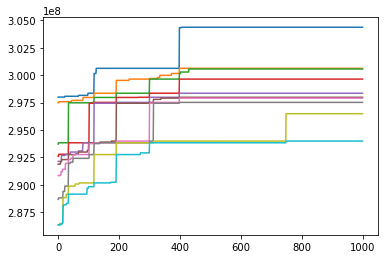

In [43]:
import matplotlib.pyplot as plt
import numpy as np
    
for i in range(len(y_plot_list)):
    plt.plot(x_plot_list, y_plot_list[i])

plt.show()

In [44]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 171992.32453608513 seconds ---


In [45]:
import pickle

with open('era-solution/rao_output-3-40', 'wb') as fp:
    pickle.dump(result, fp)
with open('era-solution/rao_xplot-3-40', 'wb') as fp:
    pickle.dump(x_plot_list, fp)
with open('era-solution/rao_yplot-3-40', 'wb') as fp:
    pickle.dump(y_plot_list, fp)
with open('era-solution/rao_aplot-3-40', 'wb') as fp:
    pickle.dump(var_a_plot_list, fp)   
with open('era-solution/rao_bplot-3-40', 'wb') as fp:
    pickle.dump(var_b_plot_list, fp) 

In [46]:
with open('era-solution/rao_output-3-40', 'rb') as fp:
    read_result = pickle.load(fp)
    
print(read_result)

[[0, 20, Timestamp('2020-11-20 16:36:59+0000', tz='UTC'), Timestamp('2020-11-21 06:10:59+0000', tz='UTC'), 47, 0.133], [1, 21, Timestamp('2020-11-20 17:14:59+0000', tz='UTC'), Timestamp('2020-11-21 06:36:01+0000', tz='UTC'), 47, 0.133], [2, 24, Timestamp('2020-11-20 16:43:20+0000', tz='UTC'), Timestamp('2020-11-21 05:39:18+0000', tz='UTC'), 47, 0.133], [3, 32, Timestamp('2020-11-20 16:44:59+0000', tz='UTC'), Timestamp('2020-11-21 05:14:59+0000', tz='UTC'), 29, 0.133], [4, 42, Timestamp('2020-11-20 17:48:48+0000', tz='UTC'), Timestamp('2020-11-21 03:40:12+0000', tz='UTC'), 37, 0.14], [5, 39, Timestamp('2020-11-20 17:54:12+0000', tz='UTC'), Timestamp('2020-11-21 00:57:39+0000', tz='UTC'), 81, 0.171], [6, 26, Timestamp('2020-11-20 18:54:04+0000', tz='UTC'), Timestamp('2020-11-21 01:49:29+0000', tz='UTC'), 60, 0.171], [7, 16, Timestamp('2020-11-20 20:02:05+0000', tz='UTC'), Timestamp('2020-11-21 04:34:48+0000', tz='UTC'), 53, 0.128], [8, 25, Timestamp('2020-11-20 21:01:38+0000', tz='UTC'),

In [47]:
with open('era-solution/rao_yplot-3-40', 'rb') as fp:
    read_yplot = pickle.load(fp)
    
print(read_yplot)

[[298004103.6681008, 298004103.6681008, 298004103.6681008, 298004103.6681008, 298004103.6681008, 298004103.6681008, 298004103.6681008, 298004103.6681008, 298004103.6681008, 298004103.6681008, 298004103.6681008, 298004103.6681008, 298004103.6681008, 298004103.6681008, 298004103.6681008, 298004103.6681008, 298004103.6681008, 298004103.6681008, 298004103.6681008, 298004103.6681008, 298004103.6681008, 298004103.6681008, 298080512.59210056, 298080512.59210056, 298080512.59210056, 298080512.59210056, 298080512.59210056, 298080512.59210056, 298080512.59210056, 298080512.59210056, 298080512.59210056, 298080512.59210056, 298080512.59210056, 298080512.59210056, 298080512.59210056, 298080512.59210056, 298080512.59210056, 298080512.59210056, 298080512.59210056, 298080512.59210056, 298080512.59210056, 298080512.59210056, 298080512.59210056, 298080512.59210056, 298080512.59210056, 298080512.59210056, 298080512.59210056, 298080512.59210056, 298080512.59210056, 298080512.59210056, 298080512.59210056, 

In [48]:
with open('era-solution/rao_output-3-40', 'rb') as fp:
    read_result = pickle.load(fp)
    print(countFitness(read_result))
    
# print(read_result)

[304370860.9021007, 5444, 28370412, 38]
